✅ GPU detected: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Total epochs: 46800, Each epoch samples: 1024, Features per epoch: 28
Valid epochs after masking: 44131

Class Distribution Before Augmentation:
Class 0: 17650 samples (39.99%)
Class 1: 3518 samples (7.97%)
Class 2: 15613 samples (35.38%)
Class 3: 2590 samples (5.87%)
Class 4: 4760 samples (10.79%)

Class Distribution After Augmentation:
Class 0: 28324 samples (35.31%)
Class 1: 8673 samples (10.81%)
Class 2: 24876 samples (31.01%)
Class 3: 6449 samples (8.04%)
Class 4: 11885 samples (14.82%)


C:\Users\DST\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(



Class Distribution After SMOTE:
Class 0: 28324 samples (20.00%)
Class 1: 28324 samples (20.00%)
Class 2: 28324 samples (20.00%)
Class 3: 28324 samples (20.00%)
Class 4: 28324 samples (20.00%)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 ppg_input (InputLayer)         [(None, 1024, 1)]    0           []                               
                                                                                                  
 gaussian_noise (GaussianNoise)  (None, 1024, 1)     0           ['ppg_input[0][0]']              
                                                                                                  
 separable_conv1d (SeparableCon  (None, 1024, 32)    79          ['gaussian_noise[0][0]']         
 v1D)                                                                                             


                                                                                                  
 average_pooling1d (AveragePool  (None, 256, 32)     0           ['max_pooling1d_1[0][0]']        
 ing1D)                                                                                           
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 256, 32)     128         ['separable_conv1d_8[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 tf.math.subtract (TFOpLambda)  (None, 256, 32)      0           ['max_pooling1d_1[0][0]',        
                                                                  'average_pooling1d[0][0]']      
                                                                                                  
 add_1 (Ad

 dense_5 (Dense)                (None, 32)           2080        ['dropout[0][0]']                
                                                                                                  
 flatten (Flatten)              (None, 8192)         0           ['layer_normalization_2[0][0]']  
                                                                                                  
 batch_normalization_14 (BatchN  (None, 32)          128         ['dense_5[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 concatenate_1 (Concatenate)    (None, 8224)         0           ['flatten[0][0]',                
                                                                  'batch_normalization_14[0][0]'] 
                                                                                                  
 dense_6 (

3541/3541 [==============================] - 272s 77ms/step - loss: 0.2693 - accuracy: 0.7386 - val_loss: 0.2600 - val_accuracy: 0.7621 - lr: 2.5000e-05
Epoch 84/100
3541/3541 [==============================] - 271s 77ms/step - loss: 0.2690 - accuracy: 0.7390 - val_loss: 0.2594 - val_accuracy: 0.7619 - lr: 2.5000e-05
Epoch 85/100
3541/3541 [==============================] - 272s 77ms/step - loss: 0.2691 - accuracy: 0.7409 - val_loss: 0.2593 - val_accuracy: 0.7624 - lr: 2.5000e-05
Epoch 86/100
3541/3541 [==============================] - 275s 78ms/step - loss: 0.2691 - accuracy: 0.7399 - val_loss: 0.2601 - val_accuracy: 0.7607 - lr: 2.5000e-05
Epoch 87/100
3541/3541 [==============================] - 274s 77ms/step - loss: 0.2693 - accuracy: 0.7392 - val_loss: 0.2592 - val_accuracy: 0.7624 - lr: 2.5000e-05
Epoch 88/100
3541/3541 [==============================] - 275s 78ms/step - loss: 0.2699 - accuracy: 0.7380 - val_loss: 0.2593 - val_accuracy: 0.7606 - lr: 2.5000e-05
Epoch 89/100
3541

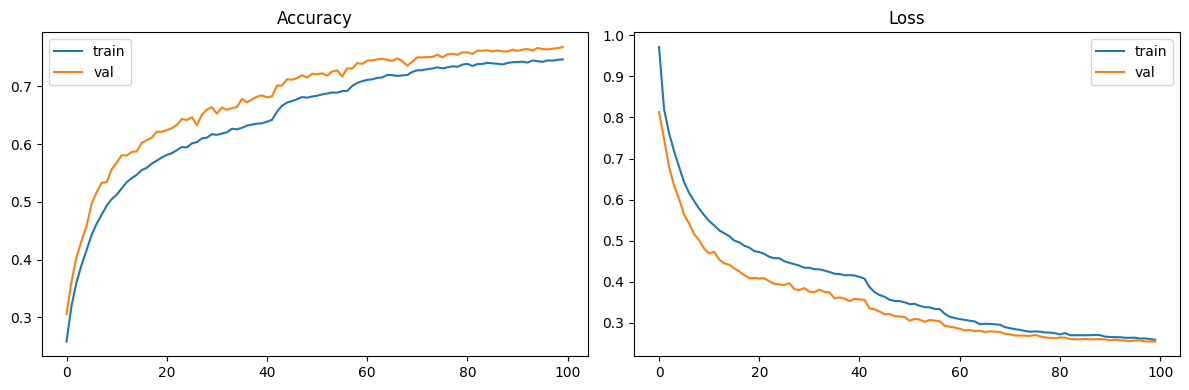

886/886 [==============================] - 15s 17ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.62      0.70      5665
           1       0.72      0.91      0.80      5664
           2       0.71      0.49      0.58      5665
           3       0.86      0.97      0.91      5665
           4       0.75      0.86      0.80      5665

    accuracy                           0.77     28324
   macro avg       0.77      0.77      0.76     28324
weighted avg       0.77      0.77      0.76     28324

Confusion Matrix:
[[3494  701  854  126  490]
 [  99 5130  104   65  266]
 [ 670  851 2773  547  824]
 [  10   57   33 5504   61]
 [  78  415  147  169 4856]]

🧠 Cohen Kappa Score: 0.7102


INFO:tensorflow:Assets written to: C:\Users\DST\AppData\Local\Temp\tmpfukx930f\assets


INFO:tensorflow:Assets written to: C:\Users\DST\AppData\Local\Temp\tmpfukx930f\assets



⏱️ Total training time: 464.28 minutes


In [3]:
import numpy as np
import os, glob, scipy.io, time
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import cheby2, filtfilt, resample_poly
from numpy.polynomial.polynomial import Polynomial
import pywt
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, SeparableConv1D, MaxPooling1D, GlobalAveragePooling1D,
                                     Flatten, Dense, Dropout, Multiply, Add, LayerNormalization,
                                     Lambda, GaussianNoise, BatchNormalization, SpatialDropout1D,
                                     Concatenate, Masking)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

tf.keras.backend.clear_session()

# --- GPU setup ---
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"✅ GPU detected: {gpus[0]}")
    tf.config.experimental.set_memory_growth(gpus[0], True)
else:
    print("⚠️ No GPU found. Training might be slow.")

# --- Constants ---
ORIG_FS = 256
TARGET_FS = 34.3
EPOCH_SAMPLES = 1024
TOTAL_HOURS = 10
EPOCHS_PER_HOUR = int(3600 * TARGET_FS / EPOCH_SAMPLES)
TOTAL_EPOCHS = TOTAL_HOURS * EPOCHS_PER_HOUR
DWT_LEVELS = 4
WAVELET = 'db4'

# --- Hjorth Parameters ---
def hjorth_parameters(signal):
    activity = np.var(signal)
    diff = np.diff(signal)
    mobility = np.std(diff) / (np.std(signal) + 1e-10)
    diff2 = np.diff(diff)
    complexity = (np.std(diff2) / (np.std(diff) + 1e-10)) / (mobility + 1e-10)
    return np.array([activity, mobility, complexity])

# --- Preprocessing functions ---
def cheby2_lowpass_filter(signal, fs, cutoff=8, order=8, rs=40):
    nyq = 0.5 * fs
    wp = cutoff / nyq
    b, a = cheby2(order, rs, wp, btype='low', analog=False)
    filtered = filtfilt(b, a, signal)
    return filtered

def poly_detrend(signal, degree=10):
    x = np.arange(len(signal))
    coefs = Polynomial.fit(x, signal, degree).convert().coef
    trend = np.polyval(coefs[::-1], x)
    detrended = signal - trend
    return detrended

def min_max_norm(signal):
    min_val = np.min(signal)
    max_val = np.max(signal)
    if max_val - min_val == 0:
        return signal * 0
    return (signal - min_val) / (max_val - min_val)

def extract_features(signal, wavelet=WAVELET, level=DWT_LEVELS):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    dwt_features = []
    for c in coeffs:
        dwt_features.extend([
            np.mean(c),
            np.std(c),
            np.sum(c**2),
            skew(c, bias=False),
            kurtosis(c, bias=False)
        ])
    hjorth = hjorth_parameters(signal)
    return np.concatenate([dwt_features, hjorth])

def preprocess_ppg_signal(ppg_signal, orig_fs=ORIG_FS, target_fs=TARGET_FS,
                          epoch_samples=EPOCH_SAMPLES, total_epochs=TOTAL_EPOCHS):
    filtered = cheby2_lowpass_filter(ppg_signal, orig_fs)
    detrended = poly_detrend(filtered)
    normalized = min_max_norm(detrended)
    up = int(target_fs * 1000)
    down = int(orig_fs * 1000)
    gcd = np.gcd(up, down)
    up //= gcd
    down //= gcd
    resampled = resample_poly(normalized, up, down)
    total_samples = epoch_samples * total_epochs
    if len(resampled) > total_samples:
        resampled = resampled[:total_samples]
    elif len(resampled) < total_samples:
        pad_len = total_samples - len(resampled)
        resampled = np.pad(resampled, (0, pad_len), 'constant')
    epochs = resampled.reshape(total_epochs, epoch_samples)
    mask = np.array([0 if np.sum(e) == 0 else 1 for e in epochs])
    features = np.array([extract_features(epoch) for epoch in epochs])
    return epochs, features, mask

# --- Load raw data and preprocess ---
folder_path = r"D:\abhishek_extracted\insomnia"
mat_files = sorted(glob.glob(os.path.join(folder_path, "*.mat")))[:39]

X_epochs_list = []
X_features_list = []
y_epochs_list = []
mask_list = []

for file in mat_files:
    mat = scipy.io.loadmat(file)
    raw_signal = mat['ppg_signals'].flatten()
    sleep_labels = mat['sleep_stages'].flatten()
    epochs, features, mask = preprocess_ppg_signal(raw_signal)
    if len(sleep_labels) > epochs.shape[0]:
        sleep_labels = sleep_labels[:epochs.shape[0]]
    elif len(sleep_labels) < epochs.shape[0]:
        pad_len = epochs.shape[0] - len(sleep_labels)
        sleep_labels = np.pad(sleep_labels, (0, pad_len), constant_values=-1)
    X_epochs_list.append(epochs)
    X_features_list.append(features)
    y_epochs_list.append(sleep_labels)
    mask_list.append(mask)

X_all = np.vstack(X_epochs_list)
X_features_all = np.vstack(X_features_list)
y_all = np.concatenate(y_epochs_list)
mask_all = np.concatenate(mask_list)

print(f"Total epochs: {X_all.shape[0]}, Each epoch samples: {X_all.shape[1]}, Features per epoch: {X_features_all.shape[1]}")

# Save preprocessed data
np.save("ppg_epochs.npy", X_all)
np.save("features.npy", X_features_all)
np.save("sleep_labels.npy", y_all)
np.save("epoch_mask.npy", mask_all)

# --- Filter out zero-padded epochs ---
valid_idx = y_all != -1
valid_idx = valid_idx & (mask_all == 1)
X_all = X_all[valid_idx]
X_features_all = X_features_all[valid_idx]
y_all = y_all[valid_idx]

print(f"Valid epochs after masking: {len(y_all)}")

# --- Print class distribution before augmentation ---
print("\nClass Distribution Before Augmentation:")
unique, counts = np.unique(y_all, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"Class {int(cls)}: {count} samples ({count/len(y_all)*100:.2f}%)")

# --- Data Augmentation ---
def jitter(x, sigma=0.01):
    return x + np.random.normal(loc=0, scale=sigma, size=x.shape)

def scaling(x, sigma=0.1):
    return x * np.random.normal(loc=1.0, scale=sigma, size=x.shape)

def magnitude_warp(x, sigma=0.2):
    x = x.reshape(-1)
    warp = np.sin(np.linspace(0, np.pi, len(x))) * np.random.normal(1, sigma)
    return x * warp

np.random.seed(42)
augmented_ppg = []
augmented_features = []
augmented_labels = []
majority_classes = [0, 2]

for ppg, feat, label in zip(X_all, X_features_all, y_all):
    augmented_ppg.append(ppg)
    augmented_features.append(feat)
    augmented_labels.append(label)
    if label in majority_classes:
        if np.random.rand() < 0.3:
            aug_ppg = jitter(ppg, sigma=0.005)
            aug_feat = jitter(feat, sigma=0.002)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)
        if np.random.rand() < 0.3:
            aug_ppg = scaling(ppg, sigma=0.05)
            aug_feat = scaling(feat, sigma=0.02)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)
    else:
        if np.random.rand() < 0.5:
            aug_ppg = jitter(ppg)
            aug_feat = jitter(feat, sigma=0.005)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)
        if np.random.rand() < 0.5:
            aug_ppg = magnitude_warp(ppg)
            aug_feat = feat
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)
        if np.random.rand() < 0.5:
            aug_ppg = scaling(ppg)
            aug_feat = scaling(feat, sigma=0.05)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)

X_aug = np.array(augmented_ppg)
X_features_aug = np.array(augmented_features)
y_aug = np.array(augmented_labels)

# --- Print class distribution after augmentation ---
print("\nClass Distribution After Augmentation:")
unique, counts = np.unique(y_aug, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"Class {int(cls)}: {count} samples ({count/len(y_aug)*100:.2f}%)")

# --- Standardization ---
scaler_ppg = StandardScaler()
X_scaled = scaler_ppg.fit_transform(X_aug)
scaler_features = StandardScaler()
X_features_scaled = scaler_features.fit_transform(X_features_aug)

# --- Handle Class Imbalance with SMOTE ---
X_combined = np.concatenate([X_scaled, X_features_scaled], axis=1)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_combined, y_aug)

# --- Print class distribution after SMOTE ---
print("\nClass Distribution After SMOTE:")
unique, counts = np.unique(y_res, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"Class {int(cls)}: {count} samples ({count/len(y_res)*100:.2f}%)")

# Split back into PPG and features
X_res_ppg = X_res[:, :X_scaled.shape[1]]
X_res_features = X_res[:, X_scaled.shape[1]:]

# --- Class weights ---
class_weights = compute_class_weight("balanced", classes=np.unique(y_res), y=y_res)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# --- Train-test split ---
X_train_ppg, X_test_ppg, X_train_features, X_test_features, y_train, y_test = train_test_split(
    X_res_ppg, X_res_features, y_res, test_size=0.2, stratify=y_res, random_state=42
)

# Expand dims for CNN input
X_train_ppg = X_train_ppg[..., np.newaxis]
X_test_ppg = X_test_ppg[..., np.newaxis]

# One-hot encoding
num_classes = 5
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# --- Focal loss ---
def focal_loss(gamma=1.5, alpha = [0.269, 1.399, 0.323, 1.960, 1.048]):
    alpha = tf.constant(alpha, dtype=tf.float32)
    def loss_fn(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        ce = -y_true * tf.math.log(y_pred)
        alpha_factor = y_true * alpha
        modulating_factor = tf.math.pow(1.0 - y_pred, gamma)
        loss = alpha_factor * modulating_factor * ce
        return tf.reduce_mean(tf.reduce_sum(loss, axis=1))
    return loss_fn

# --- Dual-branch model ---
def build_hybrid_cnn_dwt_rvfl_light(ppg_shape, features_shape):
    reg = l2(1e-4)
    ppg_input = Input(shape=ppg_shape, name='ppg_input')
    x = GaussianNoise(0.05)(ppg_input)
    x = SeparableConv1D(32, 15, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)
    branch1 = SeparableConv1D(32, 3, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch1 = BatchNormalization()(branch1)
    branch2 = SeparableConv1D(32, 5, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch2 = BatchNormalization()(branch2)
    branch3 = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch3 = BatchNormalization()(branch3)
    concat = Concatenate()([branch1, branch2, branch3])
    squeeze = GlobalAveragePooling1D()(concat)
    excitation = Dense(32, activation='relu', kernel_regularizer=reg)(squeeze)
    excitation = BatchNormalization()(excitation)
    excitation = Dense(concat.shape[-1], activation='sigmoid', kernel_regularizer=reg)(excitation)
    excitation = Lambda(lambda s: tf.expand_dims(s, 1))(excitation)
    scaled = Multiply()([concat, excitation])
    residual = SeparableConv1D(concat.shape[-1], 1, padding='same', kernel_regularizer=reg)(x)
    residual = BatchNormalization()(residual)
    out = Add()([scaled, residual])
    x = LayerNormalization()(out)
    res = SeparableConv1D(16, 1, padding='same', kernel_regularizer=reg)(x)
    res = BatchNormalization()(res)
    x = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)
    res = SeparableConv1D(32, 1, padding='same', kernel_regularizer=reg)(res)
    res = BatchNormalization()(res)
    res = MaxPooling1D(2)(res)
    low = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    low = BatchNormalization()(low)
    high = x - tf.keras.layers.AveragePooling1D(pool_size=3, strides=1, padding='same')(x)
    x = Add()([low, high])
    x = LayerNormalization()(x)
    x = SeparableConv1D(64, 5, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)
    res = SeparableConv1D(64, 1, padding='same', kernel_regularizer=reg)(res)
    res = BatchNormalization()(res)
    res = MaxPooling1D(2)(res)
    attn = GlobalAveragePooling1D()(x)
    attn = Dense(128, activation="relu", kernel_regularizer=reg)(attn)
    attn = BatchNormalization()(attn)
    attn = Dense(64, activation="sigmoid", kernel_regularizer=reg)(attn)
    attn = Lambda(lambda z: tf.expand_dims(z, 1))(attn)
    x = Multiply()([x, attn])
    x = Add()([x, res])
    x = LayerNormalization()(x)
    ppg_out = Flatten()(x)
    features_input = Input(shape=features_shape, name='features_input')
    d = GaussianNoise(0.02)(features_input)
    d = Dense(64, activation='relu', kernel_regularizer=reg)(d)
    d = BatchNormalization()(d)
    d = Dropout(0.2)(d)
    d = Dense(32, activation='relu', kernel_regularizer=reg)(d)
    d = BatchNormalization()(d)
    features_out = d
    combined = Concatenate()([ppg_out, features_out])
    x = Dense(64, activation='relu', kernel_regularizer=reg)(combined)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    return Model(inputs=[ppg_input, features_input], outputs=outputs)

# --- Compile & train ---
model = build_hybrid_cnn_dwt_rvfl_light((X_train_ppg.shape[1], 1), (X_train_features.shape[1],))
model.compile(optimizer=Adam(2e-4),
              loss=focal_loss(gamma=1.5, alpha = [0.269, 1.399, 0.323, 1.960, 1.048]),
              metrics=['accuracy'])

model.summary()

callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint("best_model_features.keras", save_best_only=True),
    ReduceLROnPlateau(patience=3, factor=0.5)
]

start_time = time.time()

history = model.fit([X_train_ppg, X_train_features], y_train_cat,
                    validation_data=([X_test_ppg, X_test_features], y_test_cat),
                    epochs=100, batch_size=32, class_weight=class_weight_dict,
                    callbacks=callbacks, verbose=1)

end_time = time.time()

# --- Plot training curves ---
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title("Accuracy")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()

# --- Evaluation ---
y_pred = model.predict([X_test_ppg, X_test_features])
y_pred_cls = np.argmax(y_pred, axis=1)
y_true_cls = np.argmax(y_test_cat, axis=1)

print("\nClassification Report:")
print(classification_report(y_true_cls, y_pred_cls))

cm = confusion_matrix(y_true_cls, y_pred_cls)
print("Confusion Matrix:")
print(cm)

kappa = cohen_kappa_score(y_true_cls, y_pred_cls)
print(f"\n🧠 Cohen Kappa Score: {kappa:.4f}")

# --- Save model ---
model.save("cnn_features_rvfl_light_model.keras")

# --- Export TFLite ---
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("cnn_features_rvfl_light_model.tflite", "wb") as f:
    f.write(tflite_model)

print(f"\n⏱️ Total training time: {(end_time - start_time)/60:.2f} minutes")

In [4]:
from sklearn.metrics import accuracy_score

total_acc = accuracy_score(y_true_cls, y_pred_cls)
print(f"\n✅ Overall Test Accuracy: {total_acc:.4f}")


✅ Overall Test Accuracy: 0.7681


In [5]:
from sklearn.metrics import f1_score, precision_score, recall_score

print("Macro F1 Score:", f1_score(y_true_cls, y_pred_cls, average='macro'))
print("Weighted F1 Score:", f1_score(y_true_cls, y_pred_cls, average='weighted'))
print("Macro Precision:", precision_score(y_true_cls, y_pred_cls, average='macro'))
print("Macro Recall:", recall_score(y_true_cls, y_pred_cls, average='macro'))


Macro F1 Score: 0.7574779608863074
Weighted F1 Score: 0.7574764441893457
Macro Precision: 0.767017452243252
Macro Recall: 0.768152011309408


In [6]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"\n📈 Final Accuracy: Train = {final_train_acc:.4f}, Val = {final_val_acc:.4f}")
print(f"📉 Final Loss: Train = {final_train_loss:.4f}, Val = {final_val_loss:.4f}")


📈 Final Accuracy: Train = 0.7467, Val = 0.7681
📉 Final Loss: Train = 0.2581, Val = 0.2538


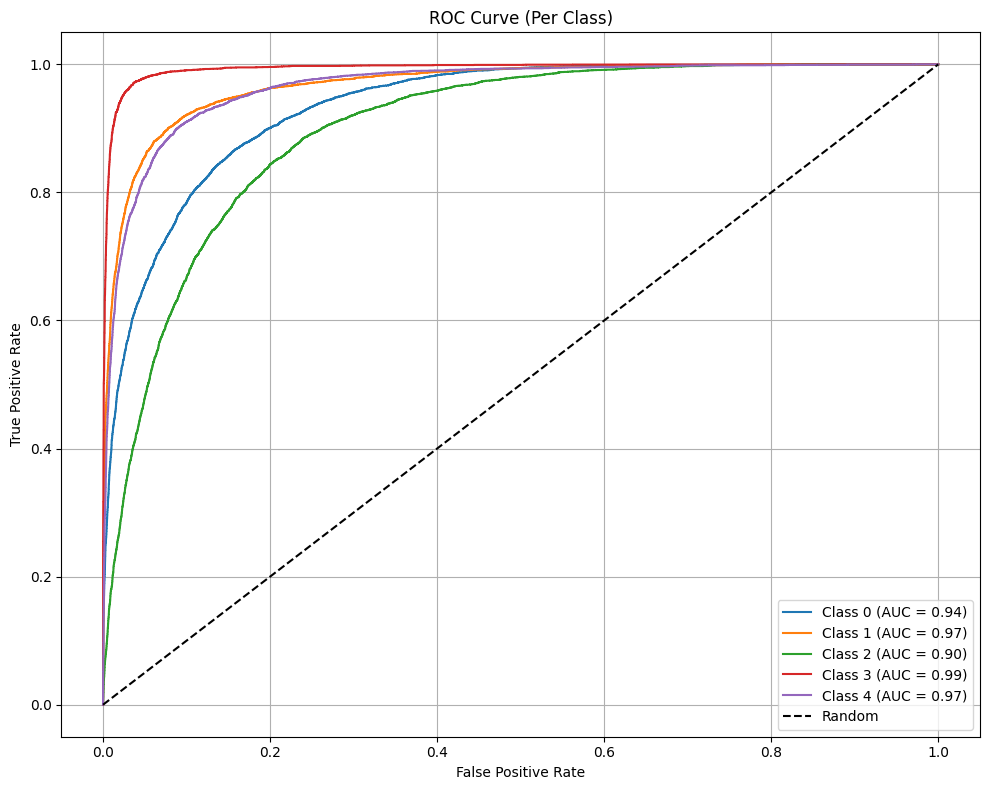

In [7]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Ensure y_test is binarized
n_classes = 5
fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Per Class)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()



✅ GPU detected: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Total epochs: 46800, Each epoch samples: 1024, Features per epoch: 28
Valid epochs after masking: 44131

Class Distribution Before Augmentation:
Class 0: 17650 samples (39.99%)
Class 1: 19131 samples (43.35%)
Class 2: 2590 samples (5.87%)
Class 3: 4760 samples (10.79%)

Class Distribution After Augmentation:
Class 0: 28368 samples (36.71%)
Class 1: 30518 samples (39.50%)
Class 2: 6428 samples (8.32%)
Class 3: 11952 samples (15.47%)

Class Distribution After SMOTE:
Class 0: 30518 samples (25.00%)
Class 1: 30518 samples (25.00%)
Class 2: 30518 samples (25.00%)
Class 3: 30518 samples (25.00%)

Fixed Focal Loss Alpha: [0.5, 0.5, 1.5, 1.0]
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 ppg_input (InputLayer)         [(None, 1024, 1)]    0         

                                                                                                  
 max_pooling1d_1 (MaxPooling1D)  (None, 256, 32)     0           ['spatial_dropout1d_1[0][0]']    
                                                                                                  
 separable_conv1d_8 (SeparableC  (None, 256, 32)     1280        ['max_pooling1d_1[0][0]']        
 onv1D)                                                                                           
                                                                                                  
 average_pooling1d (AveragePool  (None, 256, 32)     0           ['max_pooling1d_1[0][0]']        
 ing1D)                                                                                           
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 256, 32)     128         ['separable_conv1d_8[0][0]']     
 rmalizati

 dropout (Dropout)              (None, 64)           0           ['batch_normalization_13[0][0]'] 
                                                                                                  
 layer_normalization_2 (LayerNo  (None, 128, 64)     128         ['add_2[0][0]']                  
 rmalization)                                                                                     
                                                                                                  
 dense_5 (Dense)                (None, 32)           2080        ['dropout[0][0]']                
                                                                                                  
 flatten (Flatten)              (None, 8192)         0           ['layer_normalization_2[0][0]']  
                                                                                                  
 batch_normalization_14 (BatchN  (None, 32)          128         ['dense_5[0][0]']                
 ormalizat

3052/3052 [==============================] - 243s 80ms/step - loss: 0.1879 - accuracy: 0.8138 - val_loss: 0.1994 - val_accuracy: 0.8095 - lr: 5.0000e-05
Epoch 81/100
3052/3052 [==============================] - 248s 81ms/step - loss: 0.1867 - accuracy: 0.8166 - val_loss: 0.1972 - val_accuracy: 0.8106 - lr: 5.0000e-05
Epoch 82/100
3052/3052 [==============================] - 247s 81ms/step - loss: 0.1862 - accuracy: 0.8160 - val_loss: 0.1974 - val_accuracy: 0.8142 - lr: 5.0000e-05
Epoch 83/100
3052/3052 [==============================] - 248s 81ms/step - loss: 0.1861 - accuracy: 0.8165 - val_loss: 0.1946 - val_accuracy: 0.8130 - lr: 5.0000e-05
Epoch 84/100
3052/3052 [==============================] - 244s 80ms/step - loss: 0.1851 - accuracy: 0.8183 - val_loss: 0.1947 - val_accuracy: 0.8118 - lr: 5.0000e-05
Epoch 85/100
3052/3052 [==============================] - 247s 81ms/step - loss: 0.1846 - accuracy: 0.8185 - val_loss: 0.1941 - val_accuracy: 0.8145 - lr: 5.0000e-05
Epoch 86/100
3052

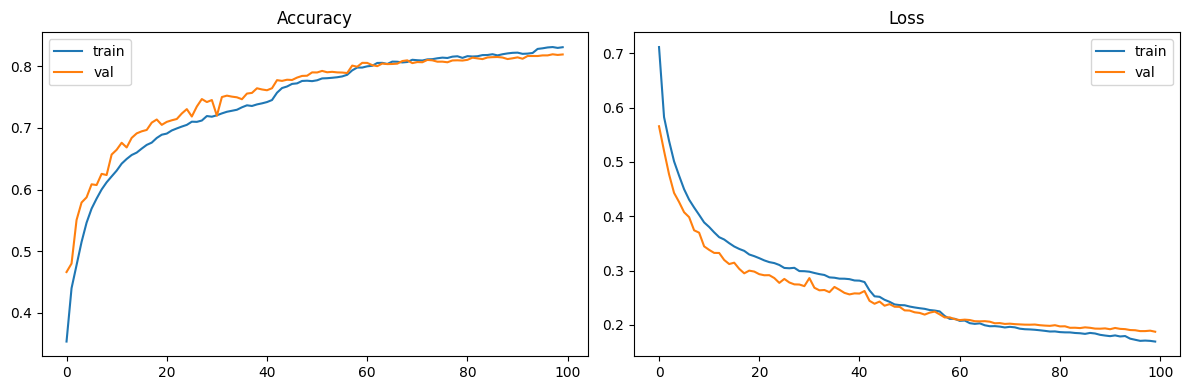

763/763 [==============================] - 15s 19ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      6104
           1       0.75      0.65      0.69      6103
           2       0.91      0.97      0.94      6104
           3       0.83      0.91      0.87      6104

    accuracy                           0.82     24415
   macro avg       0.81      0.82      0.82     24415
weighted avg       0.81      0.82      0.82     24415

Confusion Matrix:
[[4551 1072   75  406]
 [1150 3961  326  666]
 [  19   68 5915  102]
 [ 107  205  214 5578]]

🧠 Cohen Kappa Score: 0.7592


INFO:tensorflow:Assets written to: C:\Users\DST\AppData\Local\Temp\tmpy1y__xml\assets


INFO:tensorflow:Assets written to: C:\Users\DST\AppData\Local\Temp\tmpy1y__xml\assets



⏱️ Total training time: 401.93 minutes


In [1]:
import numpy as np
import os, glob, scipy.io, time
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import cheby2, filtfilt, resample_poly
from numpy.polynomial.polynomial import Polynomial
from scipy.stats import skew, kurtosis
import pywt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, SeparableConv1D, MaxPooling1D, GlobalAveragePooling1D,
                                     Flatten, Dense, Dropout, Multiply, Add, LayerNormalization,
                                     Lambda, GaussianNoise, BatchNormalization, SpatialDropout1D,
                                     Concatenate, Masking)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Set global random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

tf.keras.backend.clear_session()

# --- GPU setup ---
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"✅ GPU detected: {gpus[0]}")
    tf.config.experimental.set_memory_growth(gpus[0], True)
else:
    print("⚠️ No GPU found. Training might be slow.")

# --- Constants ---
ORIG_SF = 256
TARGET_SF = 34.3
EPOCH_SAMPLES = 1024
TOTAL_HOURS = 10
EPOCHS_PER_HOUR = int(3600 * TARGET_SF / EPOCH_SAMPLES)
TOTAL_EPOCHS = TOTAL_HOURS * EPOCHS_PER_HOUR
DWT_LEVELS = 4
WAVELET = 'db4'
NUM_CLASSES = 4

# --- Hjorth Parameters ---
def hjorth_parameters(signal):
    try:
        activity = np.var(signal)
        diff = np.diff(signal)
        mobility = np.std(diff) / (np.std(signal) + 1e-10)
        diff2 = np.diff(diff)
        complexity = (np.std(diff2) / (np.std(diff) + 1e-10)) / (mobility + 1e-10)
        return np.array([activity, mobility, complexity])
    except Exception as e:
        print(f"Error in Hjorth parameters: {e}")
        return np.zeros(3)

# --- Preprocessing functions ---
def cheby2_lowpass_filter(signal, fs, cutoff=8, order=8, rs=40):
    try:
        nyq = 0.5 * fs
        wp = cutoff / nyq
        b, a = cheby2(order, rs, wp, btype='low', analog=False)
        filtered = filtfilt(b, a, signal)
        return filtered
    except Exception as e:
        print(f"Error in cheby2 filter: {e}")
        return signal

def poly_detrend(signal, degree=10):
    try:
        x = np.arange(len(signal))
        coefs = Polynomial.fit(x, signal, degree).convert().coef
        trend = np.polyval(coefs[::-1], x)
        detrended = signal - trend
        return detrended
    except Exception as e:
        print(f"Error in detrending: {e}")
        return signal

def min_max_norm(signal):
    try:
        min_val = np.min(signal)
        max_val = np.max(signal)
        if max_val - min_val == 0:
            return signal * 0
        return (signal - min_val) / (max_val - min_val)
    except Exception as e:
        print(f"Error in normalization: {e}")
        return signal

def extract_features(signal, wavelet=WAVELET, level=DWT_LEVELS):
    try:
        coeffs = pywt.wavedec(signal, wavelet, level=level)
        dwt_features = []
        for c in coeffs:
            dwt_features.extend([
                np.mean(c),
                np.std(c),
                np.sum(c**2),
                skew(c, bias=False) if np.std(c) > 1e-10 else 0.0,
                kurtosis(c, bias=False) if np.std(c) > 1e-10 else 0.0
            ])
        hjorth = hjorth_parameters(signal)
        features = np.concatenate([dwt_features, hjorth])
        return np.nan_to_num(features, nan=0.0, posinf=0.0, neginf=0.0)
    except Exception as e:
        print(f"Error in feature extraction: {e}")
        return np.zeros(28)

def map_to_4_classes(y):
    mapping = {
        0: 0,  # Wake
        1: 1,  # N1 -> Light Sleep
        2: 1,  # N2 -> Light Sleep
        3: 2,  # N3 -> Deep Sleep
        4: 3   # REM
    }
    return np.vectorize(mapping.get)(y)

def preprocess_ppg_signal(ppg_signal, orig_fs=ORIG_SF, target_fs=TARGET_SF,
                          epoch_samples=EPOCH_SAMPLES, total_epochs=TOTAL_EPOCHS):
    try:
        filtered = cheby2_lowpass_filter(ppg_signal, orig_fs)
        detrended = poly_detrend(filtered)
        normalized = min_max_norm(detrended)
        up = int(target_fs * 1000)
        down = int(orig_fs * 1000)
        gcd = np.gcd(up, down)
        up //= gcd
        down //= gcd
        resampled = resample_poly(normalized, up, down)
        total_samples = epoch_samples * total_epochs
        if len(resampled) > total_samples:
            resampled = resampled[:total_samples]
        elif len(resampled) < total_samples:
            pad_len = total_samples - len(resampled)
            resampled = np.pad(resampled, (0, pad_len), 'constant')
        epochs = resampled.reshape(total_epochs, epoch_samples)
        mask = np.array([0 if np.sum(np.abs(e)) < 1e-10 else 1 for e in epochs])
        features = np.array([extract_features(epoch) for epoch in epochs])
        return epochs, features, mask
    except Exception as e:
        print(f"Error in preprocessing: {e}")
        return np.zeros((total_epochs, epoch_samples)), np.zeros((total_epochs, 28)), np.zeros(total_epochs)

# --- Load raw data and preprocess ---
folder_path = r"D:\abhishek_extracted\insomnia"
try:
    mat_files = sorted(glob.glob(os.path.join(folder_path, "*.mat")))[:39]
    if not mat_files:
        raise FileNotFoundError(f"No .mat files found in {folder_path}")
except Exception as e:
    print(f"Error loading files: {e}")
    exit(1)

X_epochs_list = []
X_features_list = []
y_epochs_list = []
mask_list = []

for file in mat_files:
    try:
        mat = scipy.io.loadmat(file)
        raw_signal = mat['ppg_signals'].flatten()
        sleep_labels = mat['sleep_stages'].flatten()
        sleep_labels = map_to_4_classes(sleep_labels)
        epochs, features, mask = preprocess_ppg_signal(raw_signal)
        if len(sleep_labels) > epochs.shape[0]:
            sleep_labels = sleep_labels[:epochs.shape[0]]
        elif len(sleep_labels) < epochs.shape[0]:
            pad_len = epochs.shape[0] - len(sleep_labels)
            sleep_labels = np.pad(sleep_labels, (0, pad_len), constant_values=-1)
        X_epochs_list.append(epochs)
        X_features_list.append(features)
        y_epochs_list.append(sleep_labels)
        mask_list.append(mask)
    except Exception as e:
        print(f"Error processing file {file}: {e}")
        continue

if not X_epochs_list:
    print("No valid data loaded. Exiting.")
    exit(1)

X_all = np.vstack(X_epochs_list)
X_features_all = np.vstack(X_features_list)
y_all = np.concatenate(y_epochs_list)
mask_all = np.concatenate(mask_list)

print(f"Total epochs: {X_all.shape[0]}, Each epoch samples: {X_all.shape[1]}, Features per epoch: {X_features_all.shape[1]}")

# Save preprocessed data
try:
    np.save("ppg_epochs.npy", X_all)
    np.save("features.npy", X_features_all)
    np.save("sleep_labels_4class.npy", y_all)
    np.save("epoch_mask.npy", mask_all)
except Exception as e:
    print(f"Error saving preprocessed data: {e}")

# --- Filter out invalid epochs ---
valid_idx = (y_all != -1) & (mask_all == 1)
X_all = X_all[valid_idx]
X_features_all = X_features_all[valid_idx]
y_all = y_all[valid_idx]

print(f"Valid epochs after masking: {len(y_all)}")
if len(y_all) == 0:
    print("No valid epochs after masking. Exiting.")
    exit(1)

# --- Print class distribution before augmentation ---
print("\nClass Distribution Before Augmentation:")
unique, counts = np.unique(y_all, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"Class {int(cls)}: {count} samples ({count/len(y_all)*100:.2f}%)")

# --- Data Augmentation ---
def jitter(x, sigma=0.01):
    return x + np.random.normal(loc=0, scale=sigma, size=x.shape)

def scaling(x, sigma=0.1):
    return x * np.random.normal(loc=1.0, scale=sigma, size=x.shape)

def magnitude_warp(x, sigma=0.2):
    x = x.reshape(-1)
    warp = np.sin(np.linspace(0, np.pi, len(x))) * np.random.normal(1, sigma)
    return x * warp

np.random.seed(42)
augmented_ppg = []
augmented_features = []
augmented_labels = []
majority_classes = [0, 1]  # Wake, Light Sleep

for ppg, feat, label in zip(X_all, X_features_all, y_all):
    augmented_ppg.append(ppg)
    augmented_features.append(feat)
    augmented_labels.append(label)
    if label in majority_classes:
        if np.random.rand() < 0.3:
            aug_ppg = jitter(ppg, sigma=0.005)
            aug_feat = jitter(feat, sigma=0.002)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)
        if np.random.rand() < 0.3:
            aug_ppg = scaling(ppg, sigma=0.05)
            aug_feat = scaling(feat, sigma=0.02)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)
    else:
        if np.random.rand() < 0.5:
            aug_ppg = jitter(ppg)
            aug_feat = jitter(feat, sigma=0.005)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)
        if np.random.rand() < 0.5:
            aug_ppg = magnitude_warp(ppg)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(feat)
            augmented_labels.append(label)
        if np.random.rand() < 0.5:
            aug_ppg = scaling(ppg)
            aug_feat = scaling(feat, sigma=0.05)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)

X_aug = np.array(augmented_ppg)
X_features_aug = np.array(augmented_features)
y_aug = np.array(augmented_labels)

# --- Print class distribution after augmentation ---
print("\nClass Distribution After Augmentation:")
unique, counts = np.unique(y_aug, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"Class {int(cls)}: {count} samples ({count/len(y_aug)*100:.2f}%)")

# --- Standardization ---
try:
    scaler_ppg = StandardScaler()
    X_scaled = scaler_ppg.fit_transform(X_aug)
    scaler_features = StandardScaler()
    X_features_scaled = scaler_features.fit_transform(X_features_aug)
except Exception as e:
    print(f"Error in standardization: {e}")
    exit(1)

# --- Validate data ---
if np.any(np.isnan(X_scaled)) or np.any(np.isinf(X_scaled)):
    raise ValueError("NaN or infinite values in X_scaled")
if np.any(np.isnan(X_features_scaled)) or np.any(np.isinf(X_features_scaled)):
    raise ValueError("NaN or infinite values in X_features_scaled")
if X_scaled.shape[0] != y_aug.shape[0] or X_features_scaled.shape[0] != y_aug.shape[0]:
    raise ValueError(f"Inconsistent sample sizes: X_scaled={X_scaled.shape[0]}, X_features_scaled={X_features_scaled.shape[0]}, y_aug={y_aug.shape[0]}")

# --- Handle Class Imbalance with SMOTE ---
try:
    X_combined = np.concatenate([X_scaled, X_features_scaled], axis=1)
    min_samples = 6  # SMOTE k_neighbors=5 requires at least 6 samples
    class_counts = np.bincount(y_aug.astype(int), minlength=NUM_CLASSES)
    if np.any(class_counts < min_samples):
        print("\nWarning: Some classes have too few samples for SMOTE. Adjusting k_neighbors.")
        k_neighbors = min(np.min(class_counts[class_counts > 0]) - 1, 5)
        smote = SMOTE(random_state=42, k_neighbors=k_neighbors if k_neighbors > 0 else 1)
    else:
        smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_combined, y_aug)
except Exception as e:
    print(f"Error in SMOTE: {e}")
    exit(1)

# Split back into PPG and features
X_res_ppg = X_res[:, :X_scaled.shape[1]]
X_res_features = X_res[:, X_scaled.shape[1]:]

# --- Print class distribution after SMOTE ---
print("\nClass Distribution After SMOTE:")
unique, counts = np.unique(y_res, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"Class {int(cls)}: {count} samples ({count/len(y_res)*100:.2f}%)")

# --- Class weights ---
try:
    class_weights = compute_class_weight("balanced", classes=np.unique(y_res), y=y_res)
    class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
except Exception as e:
    print(f"Error computing class weights: {e}")
    exit(1)

# --- Train-test split ---
try:
    X_train_ppg, X_test_ppg, X_train_features, X_test_features, y_train, y_test = train_test_split(
        X_res_ppg, X_res_features, y_res, test_size=0.2, stratify=y_res, random_state=42
    )
except Exception as e:
    print(f"Error in train-test split: {e}")
    exit(1)

# Expand dims for CNN input
try:
    X_train_ppg = X_train_ppg[..., np.newaxis]
    X_test_ppg = X_test_ppg[..., np.newaxis]
except Exception as e:
    print(f"Error in expanding dimensions: {e}")
    exit(1)

# One-hot encoding
try:
    y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=NUM_CLASSES)
    y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=NUM_CLASSES)
except Exception as e:
    print(f"Error in one-hot encoding: {e}")
    exit(1)

# --- Fixed alpha for focal loss ---
alpha_fixed = np.array([0.5, 0.5, 1.5, 1.0])
print(f"\nFixed Focal Loss Alpha: {alpha_fixed.tolist()}")

# --- Focal loss function ---
def focal_loss(gamma=1.5, alpha=alpha_fixed):
    alpha = tf.constant(alpha, dtype=tf.float32)
    
    def loss_fn(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        ce = -y_true * tf.math.log(y_pred)
        alpha_factor = y_true * alpha
        modulating_factor = tf.math.pow(1.0 - y_pred, gamma)
        loss = alpha_factor * modulating_factor * ce
        return tf.reduce_mean(tf.reduce_sum(loss, axis=1))
    
    return loss_fn

# --- Dual-branch model ---
def build_hybrid_cnn_dwt_rvfl_light(ppg_shape, features_shape):
    reg = l2(1e-4)
    ppg_input = Input(shape=ppg_shape, name='ppg_input')
    x = GaussianNoise(0.05)(ppg_input)
    x = SeparableConv1D(32, 15, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)
    branch1 = SeparableConv1D(32, 3, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch1 = BatchNormalization()(branch1)
    branch2 = SeparableConv1D(32, 5, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch2 = BatchNormalization()(branch2)
    branch3 = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch3 = BatchNormalization()(branch3)
    concat = Concatenate()([branch1, branch2, branch3])
    squeeze = GlobalAveragePooling1D()(concat)
    excitation = Dense(32, activation='relu', kernel_regularizer=reg)(squeeze)
    excitation = BatchNormalization()(excitation)
    excitation = Dense(concat.shape[-1], activation='sigmoid', kernel_regularizer=reg)(excitation)
    excitation = Lambda(lambda s: tf.expand_dims(s, 1))(excitation)
    scaled = Multiply()([concat, excitation])
    residual = SeparableConv1D(concat.shape[-1], 1, padding='same', kernel_regularizer=reg)(x)
    residual = BatchNormalization()(residual)
    out = Add()([scaled, residual])
    x = LayerNormalization()(out)
    res = SeparableConv1D(16, 1, padding='same', kernel_regularizer=reg)(x)
    res = BatchNormalization()(res)
    x = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)
    res = SeparableConv1D(32, 1, padding='same', kernel_regularizer=reg)(res)
    res = BatchNormalization()(res)
    res = MaxPooling1D(2)(res)
    low = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    low = BatchNormalization()(low)
    high = x - tf.keras.layers.AveragePooling1D(pool_size=3, strides=1, padding='same')(x)
    x = Add()([low, high])
    x = LayerNormalization()(x)
    x = SeparableConv1D(64, 5, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)
    res = SeparableConv1D(64, 1, padding='same', kernel_regularizer=reg)(res)
    res = BatchNormalization()(res)
    res = MaxPooling1D(2)(res)
    attn = GlobalAveragePooling1D()(x)
    attn = Dense(128, activation='relu', kernel_regularizer=reg)(attn)
    attn = BatchNormalization()(attn)
    attn = Dense(64, activation='sigmoid', kernel_regularizer=reg)(attn)
    attn = Lambda(lambda z: tf.expand_dims(z, 1))(attn)
    x = Multiply()([x, attn])
    x = Add()([x, res])
    x = LayerNormalization()(x)
    ppg_out = Flatten()(x)
    features_input = Input(shape=features_shape, name='features_input')
    d = GaussianNoise(0.02)(features_input)
    d = Dense(64, activation='relu', kernel_regularizer=reg)(d)
    d = BatchNormalization()(d)
    d = Dropout(0.2)(d)
    d = Dense(32, activation='relu', kernel_regularizer=reg)(d)
    d = BatchNormalization()(d)
    features_out = d
    combined = Concatenate()([ppg_out, features_out])
    x = Dense(64, activation='relu', kernel_regularizer=reg)(combined)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    outputs = Dense(NUM_CLASSES, activation='softmax')(x)
    return Model(inputs=[ppg_input, features_input], outputs=outputs)

# --- Compile & train ---
try:
    model = build_hybrid_cnn_dwt_rvfl_light((X_train_ppg.shape[1], 1), (X_train_features.shape[1],))
    model.compile(optimizer=Adam(2e-4),
                  loss=focal_loss(gamma=1.5, alpha=alpha_fixed),
                  metrics=['accuracy'])
except Exception as e:
    print(f"Error building/compiling model: {e}")
    exit(1)

model.summary()

callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint("best_model_features_4class.keras", save_best_only=True),
    ReduceLROnPlateau(patience=3, factor=0.5)
]

start_time = time.time()

try:
    history = model.fit([X_train_ppg, X_train_features], y_train_cat,
                        validation_data=([X_test_ppg, X_test_features], y_test_cat),
                        epochs=100, batch_size=32, class_weight=class_weight_dict,
                        callbacks=callbacks, verbose=1)
except Exception as e:
    print(f"Error during training: {e}")
    exit(1)

end_time = time.time()

# --- Plot training curves ---
try:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')
    plt.title("Accuracy")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title("Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error plotting curves: {e}")

# --- Evaluation ---
try:
    y_pred = model.predict([X_test_ppg, X_test_features])
    y_pred_cls = np.argmax(y_pred, axis=1)
    y_true_cls = np.argmax(y_test_cat, axis=1)
    print("\nClassification Report:")
    print(classification_report(y_true_cls, y_pred_cls))
    cm = confusion_matrix(y_true_cls, y_pred_cls)
    print("Confusion Matrix:")
    print(cm)
    kappa = cohen_kappa_score(y_true_cls, y_pred_cls)
    print(f"\n🧠 Cohen Kappa Score: {kappa:.4f}")
except Exception as e:
    print(f"Error during evaluation: {e}")
    exit(1)

# --- Save model ---
try:
    model.save("cnn_features_rvfl_light_model_4class.keras")
except Exception as e:
    print(f"Error saving model: {e}")

# --- Export TFLite ---
try:
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()
    with open("cnn_features_rvfl_light_model_4class.tflite", "wb") as f:
        f.write(tflite_model)
except Exception as e:
    print(f"Error exporting TFLite: {e}")

print(f"\n⏱️ Total training time: {(end_time - start_time)/60:.2f} minutes")

In [2]:
from sklearn.metrics import accuracy_score

total_acc = accuracy_score(y_true_cls, y_pred_cls)
print(f"\n✅ Overall Test Accuracy: {total_acc:.4f}")


✅ Overall Test Accuracy: 0.8194


In [3]:
from sklearn.metrics import f1_score, precision_score, recall_score

print("Macro F1 Score:", f1_score(y_true_cls, y_pred_cls, average='macro'))
print("Weighted F1 Score:", f1_score(y_true_cls, y_pred_cls, average='weighted'))
print("Macro Precision:", precision_score(y_true_cls, y_pred_cls, average='macro'))
print("Macro Recall:", recall_score(y_true_cls, y_pred_cls, average='macro'))


Macro F1 Score: 0.8153447293372329
Weighted F1 Score: 0.8153496845135925
Macro Precision: 0.8148694153843281
Macro Recall: 0.8193663591525899


In [4]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"\n📈 Final Accuracy: Train = {final_train_acc:.4f}, Val = {final_val_acc:.4f}")
print(f"📉 Final Loss: Train = {final_train_loss:.4f}, Val = {final_val_loss:.4f}")


📈 Final Accuracy: Train = 0.8311, Val = 0.8194
📉 Final Loss: Train = 0.1693, Val = 0.1874


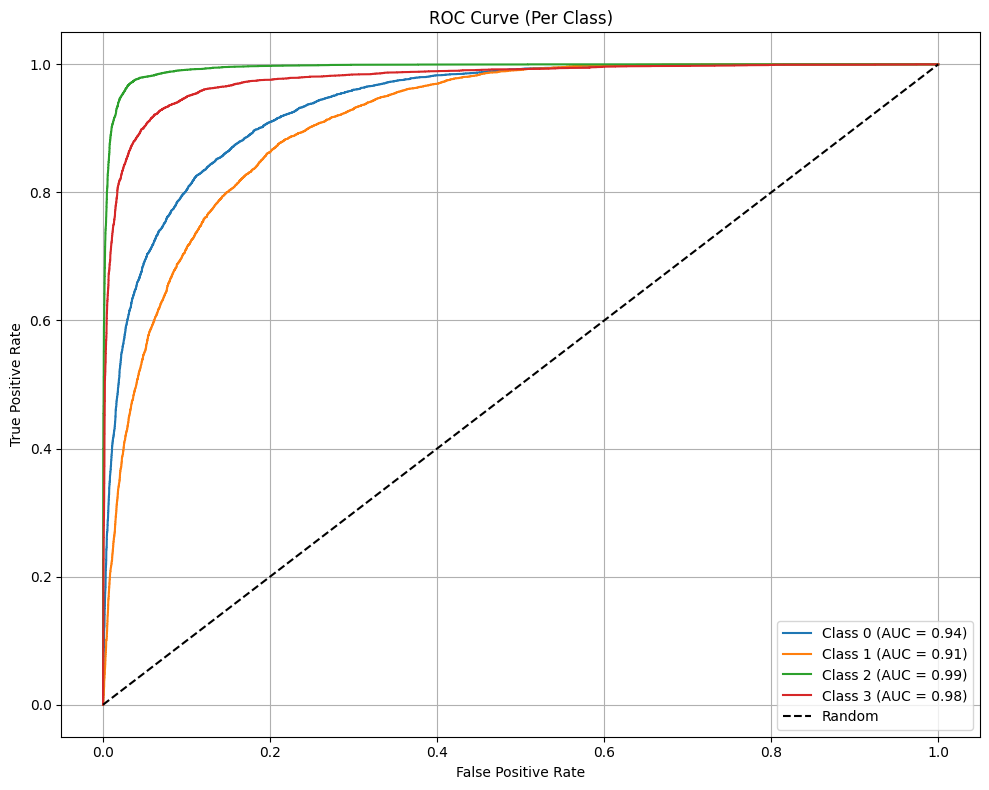

In [5]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Ensure y_test is binarized
n_classes = 4
fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Per Class)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()



✅ GPU detected: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Total epochs: 46800, Each epoch samples: 1024, Features per epoch: 28
Valid epochs after masking: 44131

Class Distribution Before Augmentation:
Class 0: 17650 samples (39.99%)
Class 1: 21721 samples (49.22%)
Class 2: 4760 samples (10.79%)

Class Distribution After Augmentation:
Class 0: 28298 samples (37.79%)
Class 1: 34678 samples (46.31%)
Class 2: 11910 samples (15.90%)

Class Distribution After SMOTE:
Class 0: 34678 samples (33.33%)
Class 1: 34678 samples (33.33%)
Class 2: 34678 samples (33.33%)

Fixed Focal Loss Alpha: [0.174, 0.149, 0.677]
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 ppg_input (InputLayer)         [(None, 1024, 1)]    0           []                               
                                                       

 max_pooling1d_1 (MaxPooling1D)  (None, 256, 32)     0           ['spatial_dropout1d_1[0][0]']    
                                                                                                  
 separable_conv1d_8 (SeparableC  (None, 256, 32)     1280        ['max_pooling1d_1[0][0]']        
 onv1D)                                                                                           
                                                                                                  
 average_pooling1d (AveragePool  (None, 256, 32)     0           ['max_pooling1d_1[0][0]']        
 ing1D)                                                                                           
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 256, 32)     128         ['separable_conv1d_8[0][0]']     
 rmalization)                                                                                     
          

                                                                                                  
 layer_normalization_2 (LayerNo  (None, 128, 64)     128         ['add_2[0][0]']                  
 rmalization)                                                                                     
                                                                                                  
 dense_5 (Dense)                (None, 32)           2080        ['dropout[0][0]']                
                                                                                                  
 flatten (Flatten)              (None, 8192)         0           ['layer_normalization_2[0][0]']  
                                                                                                  
 batch_normalization_14 (BatchN  (None, 32)          128         ['dense_5[0][0]']                
 ormalization)                                                                                    
          

2601/2601 [==============================] - 209s 80ms/step - loss: 0.0681 - accuracy: 0.7610 - val_loss: 0.0762 - val_accuracy: 0.7457 - lr: 5.0000e-05
Epoch 33/100
2601/2601 [==============================] - 207s 79ms/step - loss: 0.0673 - accuracy: 0.7623 - val_loss: 0.0742 - val_accuracy: 0.7567 - lr: 5.0000e-05
Epoch 34/100
2601/2601 [==============================] - 209s 80ms/step - loss: 0.0658 - accuracy: 0.7675 - val_loss: 0.0750 - val_accuracy: 0.7566 - lr: 5.0000e-05
Epoch 35/100
2601/2601 [==============================] - 205s 79ms/step - loss: 0.0653 - accuracy: 0.7686 - val_loss: 0.0736 - val_accuracy: 0.7637 - lr: 5.0000e-05
Epoch 36/100
2601/2601 [==============================] - 207s 80ms/step - loss: 0.0644 - accuracy: 0.7711 - val_loss: 0.0726 - val_accuracy: 0.7610 - lr: 5.0000e-05
Epoch 37/100
2601/2601 [==============================] - 206s 79ms/step - loss: 0.0646 - accuracy: 0.7707 - val_loss: 0.0749 - val_accuracy: 0.7556 - lr: 5.0000e-05
Epoch 38/100
2601

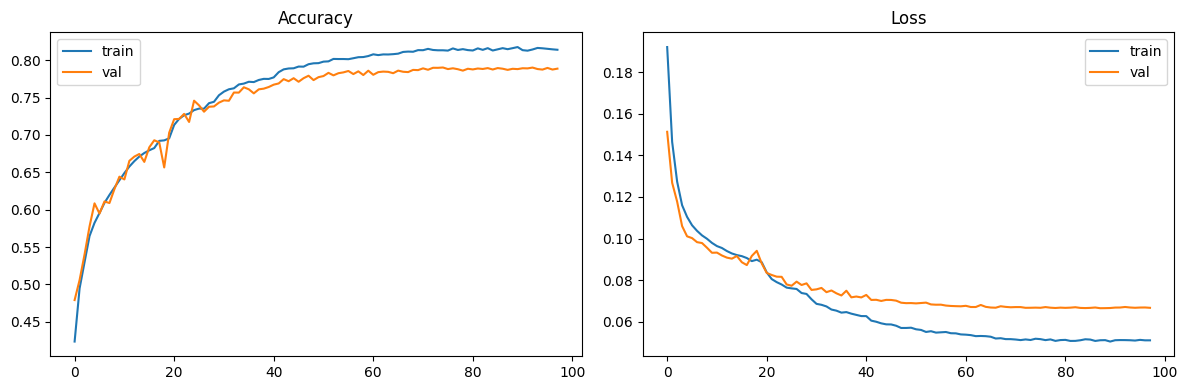

651/651 [==============================] - 13s 19ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      6935
           1       0.79      0.64      0.71      6936
           2       0.79      0.96      0.87      6936

    accuracy                           0.79     20807
   macro avg       0.79      0.79      0.78     20807
weighted avg       0.79      0.79      0.78     20807

Confusion Matrix:
[[5275 1026  634]
 [1351 4453 1132]
 [ 118  171 6647]]

🧠 Cohen Kappa Score: 0.6805


INFO:tensorflow:Assets written to: C:\Users\DST\AppData\Local\Temp\tmph5di9dbi\assets


INFO:tensorflow:Assets written to: C:\Users\DST\AppData\Local\Temp\tmph5di9dbi\assets



⏱️ Total training time: 338.15 minutes


In [7]:
import numpy as np
import os, glob, scipy.io, time
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import cheby2, filtfilt, resample_poly
from numpy.polynomial.polynomial import Polynomial
from scipy.stats import skew, kurtosis
import pywt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, SeparableConv1D, MaxPooling1D, GlobalAveragePooling1D,
                                     Flatten, Dense, Dropout, Multiply, Add, LayerNormalization,
                                     Lambda, GaussianNoise, BatchNormalization, SpatialDropout1D,
                                     Concatenate, Masking)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Set global random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

tf.keras.backend.clear_session()

# --- GPU setup ---
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"✅ GPU detected: {gpus[0]}")
    tf.config.experimental.set_memory_growth(gpus[0], True)
else:
    print("⚠️ No GPU found. Training might be slow.")

# --- Constants ---
ORIG_SF = 256
TARGET_SF = 34.3
EPOCH_SAMPLES = 1024
TOTAL_HOURS = 10
EPOCHS_PER_HOUR = int(3600 * TARGET_SF / EPOCH_SAMPLES)
TOTAL_EPOCHS = TOTAL_HOURS * EPOCHS_PER_HOUR
DWT_LEVELS = 4
WAVELET = 'db4'
NUM_CLASSES = 3

# --- Hjorth Parameters ---
def hjorth_parameters(signal):
    try:
        activity = np.var(signal)
        diff = np.diff(signal)
        mobility = np.std(diff) / (np.std(signal) + 1e-10)
        diff2 = np.diff(diff)
        complexity = (np.std(diff2) / (np.std(diff) + 1e-10)) / (mobility + 1e-10)
        return np.array([activity, mobility, complexity])
    except Exception as e:
        print(f"Error in Hjorth parameters: {e}")
        return np.zeros(3)

# --- Preprocessing functions ---
def cheby2_lowpass_filter(signal, fs, cutoff=8, order=8, rs=40):
    try:
        nyq = 0.5 * fs
        wp = cutoff / nyq
        b, a = cheby2(order, rs, wp, btype='low', analog=False)
        filtered = filtfilt(b, a, signal)
        return filtered
    except Exception as e:
        print(f"Error in cheby2 filter: {e}")
        return signal

def poly_detrend(signal, degree=10):
    try:
        x = np.arange(len(signal))
        coefs = Polynomial.fit(x, signal, degree).convert().coef
        trend = np.polyval(coefs[::-1], x)
        detrended = signal - trend
        return detrended
    except Exception as e:
        print(f"Error in detrending: {e}")
        return signal

def min_max_norm(signal):
    try:
        min_val = np.min(signal)
        max_val = np.max(signal)
        if max_val - min_val == 0:
            return signal * 0
        return (signal - min_val) / (max_val - min_val)
    except Exception as e:
        print(f"Error in normalization: {e}")
        return signal

def extract_features(signal, wavelet=WAVELET, level=DWT_LEVELS):
    try:
        coeffs = pywt.wavedec(signal, wavelet, level=level)
        dwt_features = []
        for c in coeffs:
            dwt_features.extend([
                np.mean(c),
                np.std(c),
                np.sum(c**2),
                skew(c, bias=False) if np.std(c) > 1e-10 else 0.0,
                kurtosis(c, bias=False) if np.std(c) > 1e-10 else 0.0
            ])
        hjorth = hjorth_parameters(signal)
        features = np.concatenate([dwt_features, hjorth])
        return np.nan_to_num(features, nan=0.0, posinf=0.0, neginf=0.0)
    except Exception as e:
        print(f"Error in feature extraction: {e}")
        return np.zeros(28)

def map_to_3_classes(y):
    mapping = {
        0: 0,  # Wake
        1: 1,  # N1 -> NREM
        2: 1,  # N2 -> NREM
        3: 1,  # N3 -> NREM
        4: 2   # REM
    }
    return np.vectorize(mapping.get)(y)

def preprocess_ppg_signal(ppg_signal, orig_fs=ORIG_SF, target_fs=TARGET_SF,
                          epoch_samples=EPOCH_SAMPLES, total_epochs=TOTAL_EPOCHS):
    try:
        filtered = cheby2_lowpass_filter(ppg_signal, orig_fs)
        detrended = poly_detrend(filtered)
        normalized = min_max_norm(detrended)
        up = int(target_fs * 1000)
        down = int(orig_fs * 1000)
        gcd = np.gcd(up, down)
        up //= gcd
        down //= gcd
        resampled = resample_poly(normalized, up, down)
        total_samples = epoch_samples * total_epochs
        if len(resampled) > total_samples:
            resampled = resampled[:total_samples]
        elif len(resampled) < total_samples:
            pad_len = total_samples - len(resampled)
            resampled = np.pad(resampled, (0, pad_len), 'constant')
        epochs = resampled.reshape(total_epochs, epoch_samples)
        mask = np.array([0 if np.sum(np.abs(e)) < 1e-10 else 1 for e in epochs])
        features = np.array([extract_features(epoch) for epoch in epochs])
        return epochs, features, mask
    except Exception as e:
        print(f"Error in preprocessing: {e}")
        return np.zeros((total_epochs, epoch_samples)), np.zeros((total_epochs, 28)), np.zeros(total_epochs)

# --- Load raw data and preprocess ---
folder_path = r"D:\abhishek_extracted\insomnia"
try:
    mat_files = sorted(glob.glob(os.path.join(folder_path, "*.mat")))[:39]
    if not mat_files:
        raise FileNotFoundError(f"No .mat files found in {folder_path}")
except Exception as e:
    print(f"Error loading files: {e}")
    exit(1)

X_epochs_list = []
X_features_list = []
y_epochs_list = []
mask_list = []

for file in mat_files:
    try:
        mat = scipy.io.loadmat(file)
        raw_signal = mat['ppg_signals'].flatten()
        sleep_labels = mat['sleep_stages'].flatten()
        sleep_labels = map_to_3_classes(sleep_labels)
        epochs, features, mask = preprocess_ppg_signal(raw_signal)
        if len(sleep_labels) > epochs.shape[0]:
            sleep_labels = sleep_labels[:epochs.shape[0]]
        elif len(sleep_labels) < epochs.shape[0]:
            pad_len = epochs.shape[0] - len(sleep_labels)
            sleep_labels = np.pad(sleep_labels, (0, pad_len), constant_values=-1)
        X_epochs_list.append(epochs)
        X_features_list.append(features)
        y_epochs_list.append(sleep_labels)
        mask_list.append(mask)
    except Exception as e:
        print(f"Error processing file {file}: {e}")
        continue

if not X_epochs_list:
    print("No valid data loaded. Exiting.")
    exit(1)

X_all = np.vstack(X_epochs_list)
X_features_all = np.vstack(X_features_list)
y_all = np.concatenate(y_epochs_list)
mask_all = np.concatenate(mask_list)

print(f"Total epochs: {X_all.shape[0]}, Each epoch samples: {X_all.shape[1]}, Features per epoch: {X_features_all.shape[1]}")

# Save preprocessed data
try:
    np.save("ppg_epochs.npy", X_all)
    np.save("features.npy", X_features_all)
    np.save("sleep_labels_3class.npy", y_all)
    np.save("epoch_mask.npy", mask_all)
except Exception as e:
    print(f"Error saving preprocessed data: {e}")

# --- Filter out invalid epochs ---
valid_idx = (y_all != -1) & (mask_all == 1)
X_all = X_all[valid_idx]
X_features_all = X_features_all[valid_idx]
y_all = y_all[valid_idx]

print(f"Valid epochs after masking: {len(y_all)}")
if len(y_all) == 0:
    print("No valid epochs after masking. Exiting.")
    exit(1)

# --- Print class distribution before augmentation ---
print("\nClass Distribution Before Augmentation:")
unique, counts = np.unique(y_all, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"Class {int(cls)}: {count} samples ({count/len(y_all)*100:.2f}%)")

# --- Data Augmentation ---
def jitter(x, sigma=0.01):
    return x + np.random.normal(loc=0, scale=sigma, size=x.shape)

def scaling(x, sigma=0.1):
    return x * np.random.normal(loc=1.0, scale=sigma, size=x.shape)

def magnitude_warp(x, sigma=0.2):
    x = x.reshape(-1)
    warp = np.sin(np.linspace(0, np.pi, len(x))) * np.random.normal(1, sigma)
    return x * warp

np.random.seed(42)
augmented_ppg = []
augmented_features = []
augmented_labels = []
majority_classes = [0, 1]  # Wake, NREM

for ppg, feat, label in zip(X_all, X_features_all, y_all):
    augmented_ppg.append(ppg)
    augmented_features.append(feat)
    augmented_labels.append(label)
    if label in majority_classes:
        if np.random.rand() < 0.3:
            aug_ppg = jitter(ppg, sigma=0.005)
            aug_feat = jitter(feat, sigma=0.002)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)
        if np.random.rand() < 0.3:
            aug_ppg = scaling(ppg, sigma=0.05)
            aug_feat = scaling(feat, sigma=0.02)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)
    else:
        if np.random.rand() < 0.5:
            aug_ppg = jitter(ppg)
            aug_feat = jitter(feat, sigma=0.005)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)
        if np.random.rand() < 0.5:
            aug_ppg = magnitude_warp(ppg)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(feat)
            augmented_labels.append(label)
        if np.random.rand() < 0.5:
            aug_ppg = scaling(ppg)
            aug_feat = scaling(feat, sigma=0.05)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)

X_aug = np.array(augmented_ppg)
X_features_aug = np.array(augmented_features)
y_aug = np.array(augmented_labels)

# --- Print class distribution after augmentation ---
print("\nClass Distribution After Augmentation:")
unique, counts = np.unique(y_aug, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"Class {int(cls)}: {count} samples ({count/len(y_aug)*100:.2f}%)")

# --- Standardization ---
try:
    scaler_ppg = StandardScaler()
    X_scaled = scaler_ppg.fit_transform(X_aug)
    scaler_features = StandardScaler()
    X_features_scaled = scaler_features.fit_transform(X_features_aug)
except Exception as e:
    print(f"Error in standardization: {e}")
    exit(1)

# --- Validate data ---
if np.any(np.isnan(X_scaled)) or np.any(np.isinf(X_scaled)):
    raise ValueError("NaN or infinite values in X_scaled")
if np.any(np.isnan(X_features_scaled)) or np.any(np.isinf(X_features_scaled)):
    raise ValueError("NaN or infinite values in X_features_scaled")
if X_scaled.shape[0] != y_aug.shape[0] or X_features_scaled.shape[0] != y_aug.shape[0]:
    raise ValueError(f"Inconsistent sample sizes: X_scaled={X_scaled.shape[0]}, X_features_scaled={X_features_scaled.shape[0]}, y_aug={y_aug.shape[0]}")

# --- Handle Class Imbalance with SMOTE ---
try:
    X_combined = np.concatenate([X_scaled, X_features_scaled], axis=1)
    min_samples = 6  # SMOTE k_neighbors=5 requires at least 6 samples
    class_counts = np.bincount(y_aug.astype(int), minlength=NUM_CLASSES)
    if np.any(class_counts < min_samples):
        print("\nWarning: Some classes have too few samples for SMOTE. Adjusting k_neighbors.")
        k_neighbors = min(np.min(class_counts[class_counts > 0]) - 1, 5)
        smote = SMOTE(random_state=42, k_neighbors=k_neighbors if k_neighbors > 0 else 1)
    else:
        smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_combined, y_aug)
except Exception as e:
    print(f"Error in SMOTE: {e}")
    exit(1)

# Split back into PPG and features
X_res_ppg = X_res[:, :X_scaled.shape[1]]
X_res_features = X_res[:, X_scaled.shape[1]:]

# --- Print class distribution after SMOTE ---
print("\nClass Distribution After SMOTE:")
unique, counts = np.unique(y_res, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"Class {int(cls)}: {count} samples ({count/len(y_res)*100:.2f}%)")

# --- Class weights ---
try:
    class_weights = compute_class_weight("balanced", classes=np.unique(y_res), y=y_res)
    class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
except Exception as e:
    print(f"Error computing class weights: {e}")
    exit(1)

# --- Train-test split ---
try:
    X_train_ppg, X_test_ppg, X_train_features, X_test_features, y_train, y_test = train_test_split(
        X_res_ppg, X_res_features, y_res, test_size=0.2, stratify=y_res, random_state=42
    )
except Exception as e:
    print(f"Error in train-test split: {e}")
    exit(1)

# Expand dims for CNN input
try:
    X_train_ppg = X_train_ppg[..., np.newaxis]
    X_test_ppg = X_test_ppg[..., np.newaxis]
except Exception as e:
    print(f"Error in expanding dimensions: {e}")
    exit(1)

# One-hot encoding
try:
    y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=NUM_CLASSES)
    y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=NUM_CLASSES)
except Exception as e:
    print(f"Error in one-hot encoding: {e}")
    exit(1)

# --- Fixed focal loss alpha ---
alpha = [0.174, 0.149, 0.677]
print(f"\nFixed Focal Loss Alpha: {alpha}")

# --- Focal loss ---
def focal_loss(gamma=1.5, alpha=alpha):
    alpha = tf.constant(alpha, dtype=tf.float32)
    def loss_fn(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        ce = -y_true * tf.math.log(y_pred)
        alpha_factor = y_true * alpha
        modulating_factor = tf.math.pow(1.0 - y_pred, gamma)
        loss = alpha_factor * modulating_factor * ce
        return tf.reduce_mean(tf.reduce_sum(loss, axis=1))
    return loss_fn

# --- Dual-branch model ---
def build_hybrid_cnn_dwt_rvfl_light(ppg_shape, features_shape):
    reg = l2(1e-4)
    ppg_input = Input(shape=ppg_shape, name='ppg_input')
    x = GaussianNoise(0.05)(ppg_input)
    x = SeparableConv1D(32, 15, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)
    branch1 = SeparableConv1D(32, 3, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch1 = BatchNormalization()(branch1)
    branch2 = SeparableConv1D(32, 5, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch2 = BatchNormalization()(branch2)
    branch3 = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch3 = BatchNormalization()(branch3)
    concat = Concatenate()([branch1, branch2, branch3])
    squeeze = GlobalAveragePooling1D()(concat)
    excitation = Dense(32, activation='relu', kernel_regularizer=reg)(squeeze)
    excitation = BatchNormalization()(excitation)
    excitation = Dense(concat.shape[-1], activation='sigmoid', kernel_regularizer=reg)(excitation)
    excitation = Lambda(lambda s: tf.expand_dims(s, 1))(excitation)
    scaled = Multiply()([concat, excitation])
    residual = SeparableConv1D(concat.shape[-1], 1, padding='same', kernel_regularizer=reg)(x)
    residual = BatchNormalization()(residual)
    out = Add()([scaled, residual])
    x = LayerNormalization()(out)
    res = SeparableConv1D(16, 1, padding='same', kernel_regularizer=reg)(x)
    res = BatchNormalization()(res)
    x = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)
    res = SeparableConv1D(32, 1, padding='same', kernel_regularizer=reg)(res)
    res = BatchNormalization()(res)
    res = MaxPooling1D(2)(res)
    low = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    low = BatchNormalization()(low)
    high = x - tf.keras.layers.AveragePooling1D(pool_size=3, strides=1, padding='same')(x)
    x = Add()([low, high])
    x = LayerNormalization()(x)
    x = SeparableConv1D(64, 5, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)
    res = SeparableConv1D(64, 1, padding='same', kernel_regularizer=reg)(res)
    res = BatchNormalization()(res)
    res = MaxPooling1D(2)(res)
    attn = GlobalAveragePooling1D()(x)
    attn = Dense(128, activation='relu', kernel_regularizer=reg)(attn)
    attn = BatchNormalization()(attn)
    attn = Dense(64, activation='sigmoid', kernel_regularizer=reg)(attn)
    attn = Lambda(lambda z: tf.expand_dims(z, 1))(attn)
    x = Multiply()([x, attn])
    x = Add()([x, res])
    x = LayerNormalization()(x)
    ppg_out = Flatten()(x)
    features_input = Input(shape=features_shape, name='features_input')
    d = GaussianNoise(0.02)(features_input)
    d = Dense(64, activation='relu', kernel_regularizer=reg)(d)
    d = BatchNormalization()(d)
    d = Dropout(0.2)(d)
    d = Dense(32, activation='relu', kernel_regularizer=reg)(d)
    d = BatchNormalization()(d)
    features_out = d
    combined = Concatenate()([ppg_out, features_out])
    x = Dense(64, activation='relu', kernel_regularizer=reg)(combined)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    outputs = Dense(NUM_CLASSES, activation='softmax')(x)
    return Model(inputs=[ppg_input, features_input], outputs=outputs)

# --- Compile & train ---
try:
    model = build_hybrid_cnn_dwt_rvfl_light((X_train_ppg.shape[1], 1), (X_train_features.shape[1],))
    model.compile(optimizer=Adam(2e-4),
                  loss=focal_loss(gamma=1.5),
                  metrics=['accuracy'])
except Exception as e:
    print(f"Error building/compiling model: {e}")
    exit(1)

model.summary()

callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint("best_model_features_3class.keras", save_best_only=True),
    ReduceLROnPlateau(patience=3, factor=0.5)
]

start_time = time.time()

try:
    history = model.fit([X_train_ppg, X_train_features], y_train_cat,
                        validation_data=([X_test_ppg, X_test_features], y_test_cat),
                        epochs=100, batch_size=32, class_weight=class_weight_dict,
                        callbacks=callbacks, verbose=1)
except Exception as e:
    print(f"Error during training: {e}")
    exit(1)

end_time = time.time()

# --- Plot training curves ---
try:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')
    plt.title("Accuracy")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title("Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error plotting curves: {e}")

# --- Evaluation ---
try:
    y_pred = model.predict([X_test_ppg, X_test_features])
    y_pred_cls = np.argmax(y_pred, axis=1)
    y_true_cls = np.argmax(y_test_cat, axis=1)
    print("\nClassification Report:")
    print(classification_report(y_true_cls, y_pred_cls))
    cm = confusion_matrix(y_true_cls, y_pred_cls)
    print("Confusion Matrix:")
    print(cm)
    kappa = cohen_kappa_score(y_true_cls, y_pred_cls)
    print(f"\n🧠 Cohen Kappa Score: {kappa:.4f}")
except Exception as e:
    print(f"Error during evaluation: {e}")
    exit(1)

# --- Save model ---
try:
    model.save("cnn_features_rvfl_light_model_3class.keras")
except Exception as e:
    print(f"Error saving model: {e}")

# --- Export TFLite ---
try:
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()
    with open("cnn_features_rvfl_light_model_3class.tflite", "wb") as f:
        f.write(tflite_model)
except Exception as e:
    print(f"Error exporting TFLite: {e}")

print(f"\n⏱️ Total training time: {(end_time - start_time)/60:.2f} minutes")

In [8]:
from sklearn.metrics import accuracy_score

total_acc = accuracy_score(y_true_cls, y_pred_cls)
print(f"\n✅ Overall Test Accuracy: {total_acc:.4f}")


✅ Overall Test Accuracy: 0.7870


In [9]:
from sklearn.metrics import f1_score, precision_score, recall_score

print("Macro F1 Score:", f1_score(y_true_cls, y_pred_cls, average='macro'))
print("Weighted F1 Score:", f1_score(y_true_cls, y_pred_cls, average='weighted'))
print("Macro Precision:", precision_score(y_true_cls, y_pred_cls, average='macro'))
print("Macro Recall:", recall_score(y_true_cls, y_pred_cls, average='macro'))


Macro F1 Score: 0.7816606323471942
Weighted F1 Score: 0.7816611324396454
Macro Precision: 0.7868017043660199
Macro Recall: 0.7869934945435828


In [10]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"\n📈 Final Accuracy: Train = {final_train_acc:.4f}, Val = {final_val_acc:.4f}")
print(f"📉 Final Loss: Train = {final_train_loss:.4f}, Val = {final_val_loss:.4f}")


📈 Final Accuracy: Train = 0.8139, Val = 0.7886
📉 Final Loss: Train = 0.0510, Val = 0.0667


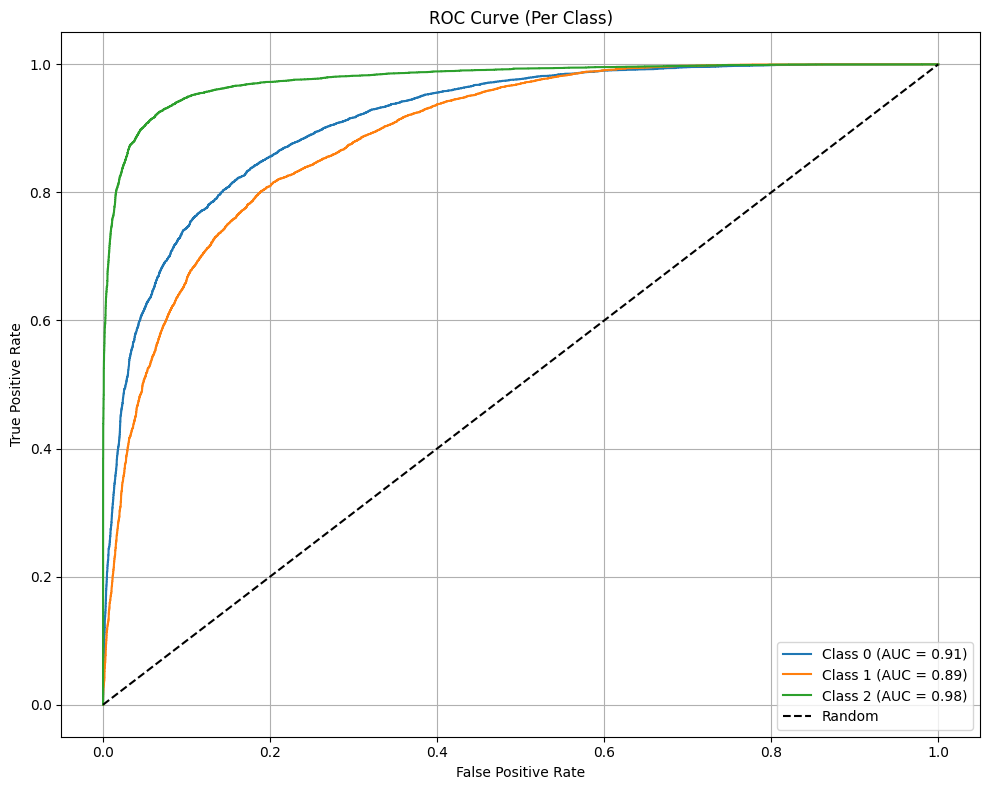

In [11]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Ensure y_test is binarized
n_classes = 3
fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Per Class)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()



✅ GPU detected: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Total epochs: 46800, Each epoch samples: 1024, Features per epoch: 28
Valid epochs after masking: 44131

Class Distribution Before Augmentation:
Class 0: 17650 samples (39.99%)
Class 1: 26481 samples (60.01%)

Class Distribution After Augmentation:
Class 0: 28250 samples (39.94%)
Class 1: 42473 samples (60.06%)

Class Distribution After SMOTE:
Class 0: 42473 samples (50.00%)
Class 1: 42473 samples (50.00%)

Fixed Focal Loss Alpha: [0.587, 0.413]
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 ppg_input (InputLayer)         [(None, 1024, 1)]    0           []                               
                                                                                                  
 gaussian_noise (GaussianNoise)  (None, 1024, 1)     0    

                                                                                                  
 separable_conv1d_8 (SeparableC  (None, 256, 32)     1280        ['max_pooling1d_1[0][0]']        
 onv1D)                                                                                           
                                                                                                  
 average_pooling1d (AveragePool  (None, 256, 32)     0           ['max_pooling1d_1[0][0]']        
 ing1D)                                                                                           
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 256, 32)     128         ['separable_conv1d_8[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 tf.math.s

 layer_normalization_2 (LayerNo  (None, 128, 64)     128         ['add_2[0][0]']                  
 rmalization)                                                                                     
                                                                                                  
 dense_5 (Dense)                (None, 32)           2080        ['dropout[0][0]']                
                                                                                                  
 flatten (Flatten)              (None, 8192)         0           ['layer_normalization_2[0][0]']  
                                                                                                  
 batch_normalization_14 (BatchN  (None, 32)          128         ['dense_5[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 concatena

Epoch 33/100
2124/2124 [==============================] - 179s 84ms/step - loss: 0.0642 - accuracy: 0.8703 - val_loss: 0.0841 - val_accuracy: 0.8382 - lr: 2.5000e-05
Epoch 34/100
2124/2124 [==============================] - 179s 84ms/step - loss: 0.0639 - accuracy: 0.8719 - val_loss: 0.0841 - val_accuracy: 0.8368 - lr: 2.5000e-05
Epoch 35/100
2124/2124 [==============================] - 179s 84ms/step - loss: 0.0632 - accuracy: 0.8745 - val_loss: 0.0838 - val_accuracy: 0.8370 - lr: 2.5000e-05
Epoch 36/100
2124/2124 [==============================] - 180s 85ms/step - loss: 0.0622 - accuracy: 0.8747 - val_loss: 0.0837 - val_accuracy: 0.8371 - lr: 1.2500e-05
Epoch 37/100
2124/2124 [==============================] - 181s 85ms/step - loss: 0.0620 - accuracy: 0.8752 - val_loss: 0.0835 - val_accuracy: 0.8376 - lr: 1.2500e-05
Epoch 38/100
2124/2124 [==============================] - 183s 86ms/step - loss: 0.0616 - accuracy: 0.8767 - val_loss: 0.0831 - val_accuracy: 0.8394 - lr: 1.2500e-05
Epoc

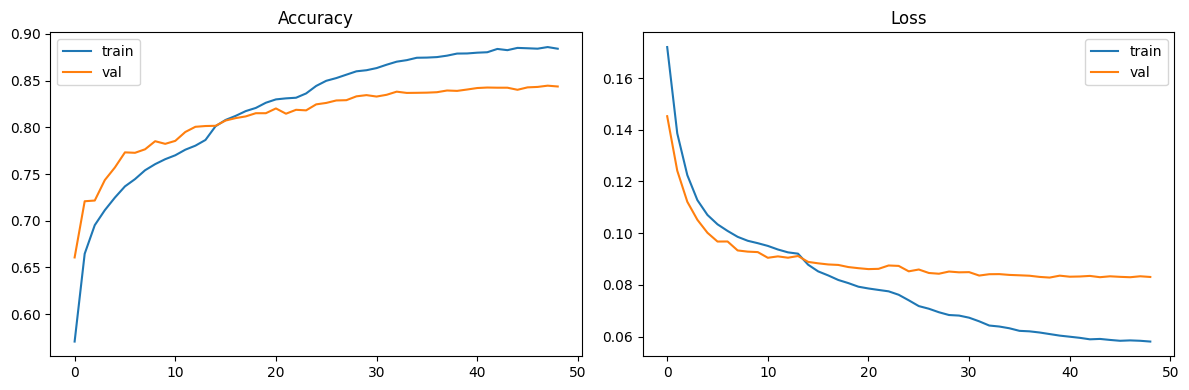

531/531 [==============================] - 10s 18ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      8495
           1       0.86      0.81      0.84      8495

    accuracy                           0.84     16990
   macro avg       0.84      0.84      0.84     16990
weighted avg       0.84      0.84      0.84     16990

Confusion Matrix:
[[7333 1162]
 [1573 6922]]

🧠 Cohen Kappa Score: 0.6780


INFO:tensorflow:Assets written to: C:\Users\DST\AppData\Local\Temp\tmpwiupexxm\assets


INFO:tensorflow:Assets written to: C:\Users\DST\AppData\Local\Temp\tmpwiupexxm\assets



⏱️ Total training time: 144.22 minutes


In [12]:
import numpy as np
import os, glob, scipy.io, time
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import cheby2, filtfilt, resample_poly
from numpy.polynomial.polynomial import Polynomial
from scipy.stats import skew, kurtosis
import pywt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, SeparableConv1D, MaxPooling1D, GlobalAveragePooling1D,
                                     Flatten, Dense, Dropout, Multiply, Add, LayerNormalization,
                                     Lambda, GaussianNoise, BatchNormalization, SpatialDropout1D,
                                     Concatenate, Masking)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Set global random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

tf.keras.backend.clear_session()

# --- GPU setup ---
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"✅ GPU detected: {gpus[0]}")
    tf.config.experimental.set_memory_growth(gpus[0], True)
else:
    print("⚠️ No GPU found. Training might be slow.")

# --- Constants ---
ORIG_SF = 256
TARGET_SF = 34.3
EPOCH_SAMPLES = 1024
TOTAL_HOURS = 10
EPOCHS_PER_HOUR = int(3600 * TARGET_SF / EPOCH_SAMPLES)
TOTAL_EPOCHS = TOTAL_HOURS * EPOCHS_PER_HOUR
DWT_LEVELS = 4
WAVELET = 'db4'
NUM_CLASSES = 2

# --- Hjorth Parameters ---
def hjorth_parameters(signal):
    try:
        activity = np.var(signal)
        diff = np.diff(signal)
        mobility = np.std(diff) / (np.std(signal) + 1e-10)
        diff2 = np.diff(diff)
        complexity = (np.std(diff2) / (np.std(diff) + 1e-10)) / (mobility + 1e-10)
        return np.array([activity, mobility, complexity])
    except Exception as e:
        print(f"Error in Hjorth parameters: {e}")
        return np.zeros(3)

# --- Preprocessing functions ---
def cheby2_lowpass_filter(signal, fs, cutoff=8, order=8, rs=40):
    try:
        nyq = 0.5 * fs
        wp = cutoff / nyq
        b, a = cheby2(order, rs, wp, btype='low', analog=False)
        filtered = filtfilt(b, a, signal)
        return filtered
    except Exception as e:
        print(f"Error in cheby2 filter: {e}")
        return signal

def poly_detrend(signal, degree=10):
    try:
        x = np.arange(len(signal))
        coefs = Polynomial.fit(x, signal, degree).convert().coef
        trend = np.polyval(coefs[::-1], x)
        detrended = signal - trend
        return detrended
    except Exception as e:
        print(f"Error in detrending: {e}")
        return signal

def min_max_norm(signal):
    try:
        min_val = np.min(signal)
        max_val = np.max(signal)
        if max_val - min_val == 0:
            return signal * 0
        return (signal - min_val) / (max_val - min_val)
    except Exception as e:
        print(f"Error in normalization: {e}")
        return signal

def extract_features(signal, wavelet=WAVELET, level=DWT_LEVELS):
    try:
        coeffs = pywt.wavedec(signal, wavelet, level=level)
        dwt_features = []
        for c in coeffs:
            dwt_features.extend([
                np.mean(c),
                np.std(c),
                np.sum(c**2),
                skew(c, bias=False) if np.std(c) > 1e-10 else 0.0,
                kurtosis(c, bias=False) if np.std(c) > 1e-10 else 0.0
            ])
        hjorth = hjorth_parameters(signal)
        features = np.concatenate([dwt_features, hjorth])
        return np.nan_to_num(features, nan=0.0, posinf=0.0, neginf=0.0)
    except Exception as e:
        print(f"Error in feature extraction: {e}")
        return np.zeros(28)

def map_to_3_classes(y):
    mapping = {
        0: 0,  # Wake
        1: 1,  # N1 -> NREM
        2: 1,  # N2 -> NREM
        3: 1,  # N3 -> NREM
        4: 1   # No-Wake
    }
    return np.vectorize(mapping.get)(y)

def preprocess_ppg_signal(ppg_signal, orig_fs=ORIG_SF, target_fs=TARGET_SF,
                          epoch_samples=EPOCH_SAMPLES, total_epochs=TOTAL_EPOCHS):
    try:
        filtered = cheby2_lowpass_filter(ppg_signal, orig_fs)
        detrended = poly_detrend(filtered)
        normalized = min_max_norm(detrended)
        up = int(target_fs * 1000)
        down = int(orig_fs * 1000)
        gcd = np.gcd(up, down)
        up //= gcd
        down //= gcd
        resampled = resample_poly(normalized, up, down)
        total_samples = epoch_samples * total_epochs
        if len(resampled) > total_samples:
            resampled = resampled[:total_samples]
        elif len(resampled) < total_samples:
            pad_len = total_samples - len(resampled)
            resampled = np.pad(resampled, (0, pad_len), 'constant')
        epochs = resampled.reshape(total_epochs, epoch_samples)
        mask = np.array([0 if np.sum(np.abs(e)) < 1e-10 else 1 for e in epochs])
        features = np.array([extract_features(epoch) for epoch in epochs])
        return epochs, features, mask
    except Exception as e:
        print(f"Error in preprocessing: {e}")
        return np.zeros((total_epochs, epoch_samples)), np.zeros((total_epochs, 28)), np.zeros(total_epochs)

# --- Load raw data and preprocess ---
folder_path = r"D:\abhishek_extracted\insomnia"
try:
    mat_files = sorted(glob.glob(os.path.join(folder_path, "*.mat")))[:39]
    if not mat_files:
        raise FileNotFoundError(f"No .mat files found in {folder_path}")
except Exception as e:
    print(f"Error loading files: {e}")
    exit(1)

X_epochs_list = []
X_features_list = []
y_epochs_list = []
mask_list = []

for file in mat_files:
    try:
        mat = scipy.io.loadmat(file)
        raw_signal = mat['ppg_signals'].flatten()
        sleep_labels = mat['sleep_stages'].flatten()
        sleep_labels = map_to_3_classes(sleep_labels)
        epochs, features, mask = preprocess_ppg_signal(raw_signal)
        if len(sleep_labels) > epochs.shape[0]:
            sleep_labels = sleep_labels[:epochs.shape[0]]
        elif len(sleep_labels) < epochs.shape[0]:
            pad_len = epochs.shape[0] - len(sleep_labels)
            sleep_labels = np.pad(sleep_labels, (0, pad_len), constant_values=-1)
        X_epochs_list.append(epochs)
        X_features_list.append(features)
        y_epochs_list.append(sleep_labels)
        mask_list.append(mask)
    except Exception as e:
        print(f"Error processing file {file}: {e}")
        continue

if not X_epochs_list:
    print("No valid data loaded. Exiting.")
    exit(1)

X_all = np.vstack(X_epochs_list)
X_features_all = np.vstack(X_features_list)
y_all = np.concatenate(y_epochs_list)
mask_all = np.concatenate(mask_list)

print(f"Total epochs: {X_all.shape[0]}, Each epoch samples: {X_all.shape[1]}, Features per epoch: {X_features_all.shape[1]}")

# Save preprocessed data
try:
    np.save("ppg_epochs.npy", X_all)
    np.save("features.npy", X_features_all)
    np.save("sleep_labels_3class.npy", y_all)
    np.save("epoch_mask.npy", mask_all)
except Exception as e:
    print(f"Error saving preprocessed data: {e}")

# --- Filter out invalid epochs ---
valid_idx = (y_all != -1) & (mask_all == 1)
X_all = X_all[valid_idx]
X_features_all = X_features_all[valid_idx]
y_all = y_all[valid_idx]

print(f"Valid epochs after masking: {len(y_all)}")
if len(y_all) == 0:
    print("No valid epochs after masking. Exiting.")
    exit(1)

# --- Print class distribution before augmentation ---
print("\nClass Distribution Before Augmentation:")
unique, counts = np.unique(y_all, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"Class {int(cls)}: {count} samples ({count/len(y_all)*100:.2f}%)")

# --- Data Augmentation ---
def jitter(x, sigma=0.01):
    return x + np.random.normal(loc=0, scale=sigma, size=x.shape)

def scaling(x, sigma=0.1):
    return x * np.random.normal(loc=1.0, scale=sigma, size=x.shape)

def magnitude_warp(x, sigma=0.2):
    x = x.reshape(-1)
    warp = np.sin(np.linspace(0, np.pi, len(x))) * np.random.normal(1, sigma)
    return x * warp

np.random.seed(42)
augmented_ppg = []
augmented_features = []
augmented_labels = []
majority_classes = [0, 1]  # Wake, NREM

for ppg, feat, label in zip(X_all, X_features_all, y_all):
    augmented_ppg.append(ppg)
    augmented_features.append(feat)
    augmented_labels.append(label)
    if label in majority_classes:
        if np.random.rand() < 0.3:
            aug_ppg = jitter(ppg, sigma=0.005)
            aug_feat = jitter(feat, sigma=0.002)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)
        if np.random.rand() < 0.3:
            aug_ppg = scaling(ppg, sigma=0.05)
            aug_feat = scaling(feat, sigma=0.02)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)
    else:
        if np.random.rand() < 0.5:
            aug_ppg = jitter(ppg)
            aug_feat = jitter(feat, sigma=0.005)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)
        if np.random.rand() < 0.5:
            aug_ppg = magnitude_warp(ppg)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(feat)
            augmented_labels.append(label)
        if np.random.rand() < 0.5:
            aug_ppg = scaling(ppg)
            aug_feat = scaling(feat, sigma=0.05)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)

X_aug = np.array(augmented_ppg)
X_features_aug = np.array(augmented_features)
y_aug = np.array(augmented_labels)

# --- Print class distribution after augmentation ---
print("\nClass Distribution After Augmentation:")
unique, counts = np.unique(y_aug, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"Class {int(cls)}: {count} samples ({count/len(y_aug)*100:.2f}%)")

# --- Standardization ---
try:
    scaler_ppg = StandardScaler()
    X_scaled = scaler_ppg.fit_transform(X_aug)
    scaler_features = StandardScaler()
    X_features_scaled = scaler_features.fit_transform(X_features_aug)
except Exception as e:
    print(f"Error in standardization: {e}")
    exit(1)

# --- Validate data ---
if np.any(np.isnan(X_scaled)) or np.any(np.isinf(X_scaled)):
    raise ValueError("NaN or infinite values in X_scaled")
if np.any(np.isnan(X_features_scaled)) or np.any(np.isinf(X_features_scaled)):
    raise ValueError("NaN or infinite values in X_features_scaled")
if X_scaled.shape[0] != y_aug.shape[0] or X_features_scaled.shape[0] != y_aug.shape[0]:
    raise ValueError(f"Inconsistent sample sizes: X_scaled={X_scaled.shape[0]}, X_features_scaled={X_features_scaled.shape[0]}, y_aug={y_aug.shape[0]}")

# --- Handle Class Imbalance with SMOTE ---
try:
    X_combined = np.concatenate([X_scaled, X_features_scaled], axis=1)
    min_samples = 6  # SMOTE k_neighbors=5 requires at least 6 samples
    class_counts = np.bincount(y_aug.astype(int), minlength=NUM_CLASSES)
    if np.any(class_counts < min_samples):
        print("\nWarning: Some classes have too few samples for SMOTE. Adjusting k_neighbors.")
        k_neighbors = min(np.min(class_counts[class_counts > 0]) - 1, 5)
        smote = SMOTE(random_state=42, k_neighbors=k_neighbors if k_neighbors > 0 else 1)
    else:
        smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_combined, y_aug)
except Exception as e:
    print(f"Error in SMOTE: {e}")
    exit(1)

# Split back into PPG and features
X_res_ppg = X_res[:, :X_scaled.shape[1]]
X_res_features = X_res[:, X_scaled.shape[1]:]

# --- Print class distribution after SMOTE ---
print("\nClass Distribution After SMOTE:")
unique, counts = np.unique(y_res, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"Class {int(cls)}: {count} samples ({count/len(y_res)*100:.2f}%)")

# --- Class weights ---
try:
    class_weights = compute_class_weight("balanced", classes=np.unique(y_res), y=y_res)
    class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
except Exception as e:
    print(f"Error computing class weights: {e}")
    exit(1)

# --- Train-test split ---
try:
    X_train_ppg, X_test_ppg, X_train_features, X_test_features, y_train, y_test = train_test_split(
        X_res_ppg, X_res_features, y_res, test_size=0.2, stratify=y_res, random_state=42
    )
except Exception as e:
    print(f"Error in train-test split: {e}")
    exit(1)

# Expand dims for CNN input
try:
    X_train_ppg = X_train_ppg[..., np.newaxis]
    X_test_ppg = X_test_ppg[..., np.newaxis]
except Exception as e:
    print(f"Error in expanding dimensions: {e}")
    exit(1)

# One-hot encoding
try:
    y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=NUM_CLASSES)
    y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=NUM_CLASSES)
except Exception as e:
    print(f"Error in one-hot encoding: {e}")
    exit(1)

# --- Fixed focal loss alpha ---
alpha = [0.587, 0.413]
print(f"\nFixed Focal Loss Alpha: {alpha}")

# --- Focal loss ---
def focal_loss(gamma=1.5, alpha=alpha):
    alpha = tf.constant(alpha, dtype=tf.float32)
    def loss_fn(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        ce = -y_true * tf.math.log(y_pred)
        alpha_factor = y_true * alpha
        modulating_factor = tf.math.pow(1.0 - y_pred, gamma)
        loss = alpha_factor * modulating_factor * ce
        return tf.reduce_mean(tf.reduce_sum(loss, axis=1))
    return loss_fn

# --- Dual-branch model ---
def build_hybrid_cnn_dwt_rvfl_light(ppg_shape, features_shape):
    reg = l2(1e-4)
    ppg_input = Input(shape=ppg_shape, name='ppg_input')
    x = GaussianNoise(0.05)(ppg_input)
    x = SeparableConv1D(32, 15, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)
    branch1 = SeparableConv1D(32, 3, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch1 = BatchNormalization()(branch1)
    branch2 = SeparableConv1D(32, 5, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch2 = BatchNormalization()(branch2)
    branch3 = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch3 = BatchNormalization()(branch3)
    concat = Concatenate()([branch1, branch2, branch3])
    squeeze = GlobalAveragePooling1D()(concat)
    excitation = Dense(32, activation='relu', kernel_regularizer=reg)(squeeze)
    excitation = BatchNormalization()(excitation)
    excitation = Dense(concat.shape[-1], activation='sigmoid', kernel_regularizer=reg)(excitation)
    excitation = Lambda(lambda s: tf.expand_dims(s, 1))(excitation)
    scaled = Multiply()([concat, excitation])
    residual = SeparableConv1D(concat.shape[-1], 1, padding='same', kernel_regularizer=reg)(x)
    residual = BatchNormalization()(residual)
    out = Add()([scaled, residual])
    x = LayerNormalization()(out)
    res = SeparableConv1D(16, 1, padding='same', kernel_regularizer=reg)(x)
    res = BatchNormalization()(res)
    x = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)
    res = SeparableConv1D(32, 1, padding='same', kernel_regularizer=reg)(res)
    res = BatchNormalization()(res)
    res = MaxPooling1D(2)(res)
    low = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    low = BatchNormalization()(low)
    high = x - tf.keras.layers.AveragePooling1D(pool_size=3, strides=1, padding='same')(x)
    x = Add()([low, high])
    x = LayerNormalization()(x)
    x = SeparableConv1D(64, 5, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)
    res = SeparableConv1D(64, 1, padding='same', kernel_regularizer=reg)(res)
    res = BatchNormalization()(res)
    res = MaxPooling1D(2)(res)
    attn = GlobalAveragePooling1D()(x)
    attn = Dense(128, activation='relu', kernel_regularizer=reg)(attn)
    attn = BatchNormalization()(attn)
    attn = Dense(64, activation='sigmoid', kernel_regularizer=reg)(attn)
    attn = Lambda(lambda z: tf.expand_dims(z, 1))(attn)
    x = Multiply()([x, attn])
    x = Add()([x, res])
    x = LayerNormalization()(x)
    ppg_out = Flatten()(x)
    features_input = Input(shape=features_shape, name='features_input')
    d = GaussianNoise(0.02)(features_input)
    d = Dense(64, activation='relu', kernel_regularizer=reg)(d)
    d = BatchNormalization()(d)
    d = Dropout(0.2)(d)
    d = Dense(32, activation='relu', kernel_regularizer=reg)(d)
    d = BatchNormalization()(d)
    features_out = d
    combined = Concatenate()([ppg_out, features_out])
    x = Dense(64, activation='relu', kernel_regularizer=reg)(combined)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    outputs = Dense(NUM_CLASSES, activation='softmax')(x)
    return Model(inputs=[ppg_input, features_input], outputs=outputs)

# --- Compile & train ---
try:
    model = build_hybrid_cnn_dwt_rvfl_light((X_train_ppg.shape[1], 1), (X_train_features.shape[1],))
    model.compile(optimizer=Adam(2e-4),
                  loss=focal_loss(gamma=1.5),
                  metrics=['accuracy'])
except Exception as e:
    print(f"Error building/compiling model: {e}")
    exit(1)

model.summary()

callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint("best_model_features_3class.keras", save_best_only=True),
    ReduceLROnPlateau(patience=3, factor=0.5)
]

start_time = time.time()

try:
    history = model.fit([X_train_ppg, X_train_features], y_train_cat,
                        validation_data=([X_test_ppg, X_test_features], y_test_cat),
                        epochs=100, batch_size=32, class_weight=class_weight_dict,
                        callbacks=callbacks, verbose=1)
except Exception as e:
    print(f"Error during training: {e}")
    exit(1)

end_time = time.time()

# --- Plot training curves ---
try:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')
    plt.title("Accuracy")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title("Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error plotting curves: {e}")

# --- Evaluation ---
try:
    y_pred = model.predict([X_test_ppg, X_test_features])
    y_pred_cls = np.argmax(y_pred, axis=1)
    y_true_cls = np.argmax(y_test_cat, axis=1)
    print("\nClassification Report:")
    print(classification_report(y_true_cls, y_pred_cls))
    cm = confusion_matrix(y_true_cls, y_pred_cls)
    print("Confusion Matrix:")
    print(cm)
    kappa = cohen_kappa_score(y_true_cls, y_pred_cls)
    print(f"\n🧠 Cohen Kappa Score: {kappa:.4f}")
except Exception as e:
    print(f"Error during evaluation: {e}")
    exit(1)

# --- Save model ---
try:
    model.save("cnn_features_rvfl_light_model_3class.keras")
except Exception as e:
    print(f"Error saving model: {e}")

# --- Export TFLite ---
try:
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()
    with open("cnn_features_rvfl_light_model_3class.tflite", "wb") as f:
        f.write(tflite_model)
except Exception as e:
    print(f"Error exporting TFLite: {e}")

print(f"\n⏱️ Total training time: {(end_time - start_time)/60:.2f} minutes")

In [13]:
from sklearn.metrics import accuracy_score

total_acc = accuracy_score(y_true_cls, y_pred_cls)
print(f"\n✅ Overall Test Accuracy: {total_acc:.4f}")


✅ Overall Test Accuracy: 0.8390


In [14]:
from sklearn.metrics import f1_score, precision_score, recall_score

print("Macro F1 Score:", f1_score(y_true_cls, y_pred_cls, average='macro'))
print("Weighted F1 Score:", f1_score(y_true_cls, y_pred_cls, average='weighted'))
print("Macro Precision:", precision_score(y_true_cls, y_pred_cls, average='macro'))
print("Macro Recall:", recall_score(y_true_cls, y_pred_cls, average='macro'))


Macro F1 Score: 0.8389286973658214
Weighted F1 Score: 0.8389286973658214
Macro Precision: 0.8398183879505481
Macro Recall: 0.8390229546792232


In [15]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"\n📈 Final Accuracy: Train = {final_train_acc:.4f}, Val = {final_val_acc:.4f}")
print(f"📉 Final Loss: Train = {final_train_loss:.4f}, Val = {final_val_loss:.4f}")


📈 Final Accuracy: Train = 0.8842, Val = 0.8437
📉 Final Loss: Train = 0.0580, Val = 0.0830


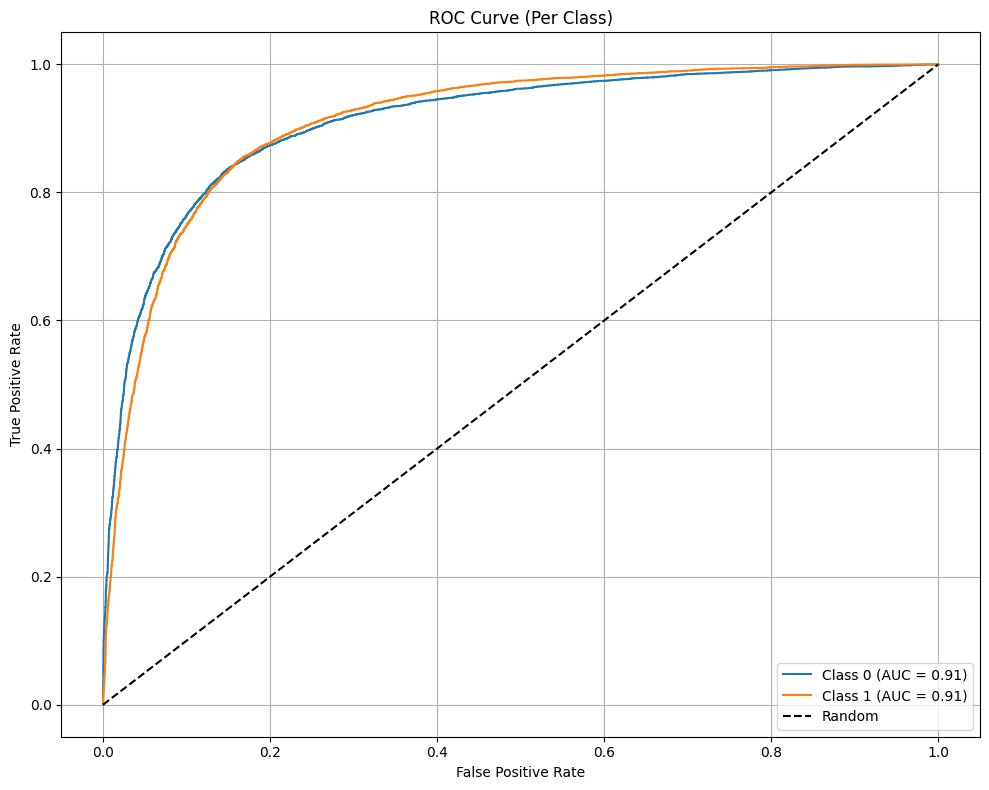

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Ensure y_test is binarized
n_classes = 2
fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Per Class)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()



✅ GPU detected: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Total epochs: 46800, Each epoch samples: 1024, Features per epoch: 28
Valid epochs after masking: 44131

Class Distribution Before Augmentation:
Class 0: 17650 samples (39.99%)
Class 1: 21721 samples (49.22%)
Class 2: 4760 samples (10.79%)

Class Distribution After Augmentation:
Class 0: 28298 samples (37.79%)
Class 1: 34678 samples (46.31%)
Class 2: 11910 samples (15.90%)

Class Distribution After SMOTE:
Class 0: 34678 samples (33.33%)
Class 1: 34678 samples (33.33%)
Class 2: 34678 samples (33.33%)

Fixed Focal Loss Alpha: [0.174, 0.149, 0.677]
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 ppg_input (InputLayer)         [(None, 1024, 1)]    0           []                               
                                                       

 max_pooling1d_1 (MaxPooling1D)  (None, 256, 32)     0           ['spatial_dropout1d_1[0][0]']    
                                                                                                  
 separable_conv1d_8 (SeparableC  (None, 256, 32)     1280        ['max_pooling1d_1[0][0]']        
 onv1D)                                                                                           
                                                                                                  
 average_pooling1d (AveragePool  (None, 256, 32)     0           ['max_pooling1d_1[0][0]']        
 ing1D)                                                                                           
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 256, 32)     128         ['separable_conv1d_8[0][0]']     
 rmalization)                                                                                     
          

                                                                                                  
 layer_normalization_2 (LayerNo  (None, 128, 64)     128         ['add_2[0][0]']                  
 rmalization)                                                                                     
                                                                                                  
 dense_5 (Dense)                (None, 32)           2080        ['dropout[0][0]']                
                                                                                                  
 flatten (Flatten)              (None, 8192)         0           ['layer_normalization_2[0][0]']  
                                                                                                  
 batch_normalization_14 (BatchN  (None, 32)          128         ['dense_5[0][0]']                
 ormalization)                                                                                    
          

2601/2601 [==============================] - 231s 89ms/step - loss: 0.0699 - accuracy: 0.7538 - val_loss: 0.0763 - val_accuracy: 0.7450 - lr: 5.0000e-05
Epoch 33/100
2601/2601 [==============================] - 226s 87ms/step - loss: 0.0686 - accuracy: 0.7570 - val_loss: 0.0747 - val_accuracy: 0.7514 - lr: 5.0000e-05
Epoch 34/100
2601/2601 [==============================] - 223s 86ms/step - loss: 0.0672 - accuracy: 0.7638 - val_loss: 0.0754 - val_accuracy: 0.7571 - lr: 5.0000e-05
Epoch 35/100
2601/2601 [==============================] - 225s 87ms/step - loss: 0.0666 - accuracy: 0.7631 - val_loss: 0.0749 - val_accuracy: 0.7572 - lr: 5.0000e-05
Epoch 36/100
2601/2601 [==============================] - 228s 88ms/step - loss: 0.0658 - accuracy: 0.7641 - val_loss: 0.0757 - val_accuracy: 0.7573 - lr: 5.0000e-05
Epoch 37/100
2601/2601 [==============================] - 236s 91ms/step - loss: 0.0645 - accuracy: 0.7708 - val_loss: 0.0732 - val_accuracy: 0.7633 - lr: 2.5000e-05
Epoch 38/100
2601

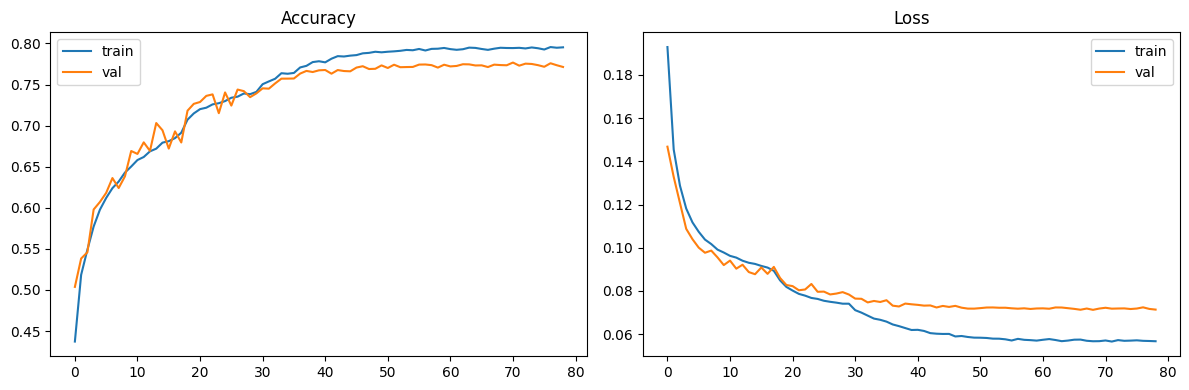

651/651 [==============================] - 10s 15ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      6935
           1       0.78      0.62      0.69      6936
           2       0.77      0.95      0.85      6936

    accuracy                           0.77     20807
   macro avg       0.77      0.77      0.77     20807
weighted avg       0.77      0.77      0.77     20807

Confusion Matrix:
[[5203 1013  719]
 [1383 4291 1262]
 [ 108  224 6604]]

🧠 Cohen Kappa Score: 0.6605


INFO:tensorflow:Assets written to: C:\Users\DST\AppData\Local\Temp\tmp138t1pqu\assets


INFO:tensorflow:Assets written to: C:\Users\DST\AppData\Local\Temp\tmp138t1pqu\assets



⏱️ Total training time: 294.89 minutes


In [1]:
import numpy as np
import os, glob, scipy.io, time
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import cheby2, filtfilt, resample_poly
from numpy.polynomial.polynomial import Polynomial
from scipy.stats import skew, kurtosis
import pywt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, SeparableConv1D, MaxPooling1D, GlobalAveragePooling1D,
                                     Flatten, Dense, Dropout, Multiply, Add, LayerNormalization,
                                     Lambda, GaussianNoise, BatchNormalization, SpatialDropout1D,
                                     Concatenate, Masking)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Set global random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

tf.keras.backend.clear_session()

# --- GPU setup ---
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"✅ GPU detected: {gpus[0]}")
    tf.config.experimental.set_memory_growth(gpus[0], True)
else:
    print("⚠️ No GPU found. Training might be slow.")

# --- Constants ---
ORIG_SF = 256
TARGET_SF = 34.3
EPOCH_SAMPLES = 1024
TOTAL_HOURS = 10
EPOCHS_PER_HOUR = int(3600 * TARGET_SF / EPOCH_SAMPLES)
TOTAL_EPOCHS = TOTAL_HOURS * EPOCHS_PER_HOUR
DWT_LEVELS = 4
WAVELET = 'db4'
NUM_CLASSES = 3

# --- Hjorth Parameters ---
def hjorth_parameters(signal):
    try:
        activity = np.var(signal)
        diff = np.diff(signal)
        mobility = np.std(diff) / (np.std(signal) + 1e-10)
        diff2 = np.diff(diff)
        complexity = (np.std(diff2) / (np.std(diff) + 1e-10)) / (mobility + 1e-10)
        return np.array([activity, mobility, complexity])
    except Exception as e:
        print(f"Error in Hjorth parameters: {e}")
        return np.zeros(3)

# --- Preprocessing functions ---
def cheby2_lowpass_filter(signal, fs, cutoff=8, order=8, rs=40):
    try:
        nyq = 0.5 * fs
        wp = cutoff / nyq
        b, a = cheby2(order, rs, wp, btype='low', analog=False)
        filtered = filtfilt(b, a, signal)
        return filtered
    except Exception as e:
        print(f"Error in cheby2 filter: {e}")
        return signal

def poly_detrend(signal, degree=10):
    try:
        x = np.arange(len(signal))
        coefs = Polynomial.fit(x, signal, degree).convert().coef
        trend = np.polyval(coefs[::-1], x)
        detrended = signal - trend
        return detrended
    except Exception as e:
        print(f"Error in detrending: {e}")
        return signal

def min_max_norm(signal):
    try:
        min_val = np.min(signal)
        max_val = np.max(signal)
        if max_val - min_val == 0:
            return signal * 0
        return (signal - min_val) / (max_val - min_val)
    except Exception as e:
        print(f"Error in normalization: {e}")
        return signal

def extract_features(signal, wavelet=WAVELET, level=DWT_LEVELS):
    try:
        coeffs = pywt.wavedec(signal, wavelet, level=level)
        dwt_features = []
        for c in coeffs:
            dwt_features.extend([
                np.mean(c),
                np.std(c),
                np.sum(c**2),
                skew(c, bias=False) if np.std(c) > 1e-10 else 0.0,
                kurtosis(c, bias=False) if np.std(c) > 1e-10 else 0.0
            ])
        hjorth = hjorth_parameters(signal)
        features = np.concatenate([dwt_features, hjorth])
        return np.nan_to_num(features, nan=0.0, posinf=0.0, neginf=0.0)
    except Exception as e:
        print(f"Error in feature extraction: {e}")
        return np.zeros(28)

def map_to_3_classes(y):
    mapping = {
        0: 0,  # Wake
        1: 1,  # N1 -> NREM
        2: 1,  # N2 -> NREM
        3: 1,  # N3 -> NREM
        4: 2   # REM
    }
    return np.vectorize(mapping.get)(y)

def preprocess_ppg_signal(ppg_signal, orig_fs=ORIG_SF, target_fs=TARGET_SF,
                          epoch_samples=EPOCH_SAMPLES, total_epochs=TOTAL_EPOCHS):
    try:
        filtered = cheby2_lowpass_filter(ppg_signal, orig_fs)
        detrended = poly_detrend(filtered)
        normalized = min_max_norm(detrended)
        up = int(target_fs * 1000)
        down = int(orig_fs * 1000)
        gcd = np.gcd(up, down)
        up //= gcd
        down //= gcd
        resampled = resample_poly(normalized, up, down)
        total_samples = epoch_samples * total_epochs
        if len(resampled) > total_samples:
            resampled = resampled[:total_samples]
        elif len(resampled) < total_samples:
            pad_len = total_samples - len(resampled)
            resampled = np.pad(resampled, (0, pad_len), 'constant')
        epochs = resampled.reshape(total_epochs, epoch_samples)
        mask = np.array([0 if np.sum(np.abs(e)) < 1e-10 else 1 for e in epochs])
        features = np.array([extract_features(epoch) for epoch in epochs])
        return epochs, features, mask
    except Exception as e:
        print(f"Error in preprocessing: {e}")
        return np.zeros((total_epochs, epoch_samples)), np.zeros((total_epochs, 28)), np.zeros(total_epochs)

# --- Load raw data and preprocess ---
folder_path = r"D:\abhishek_extracted\insomnia"
try:
    mat_files = sorted(glob.glob(os.path.join(folder_path, "*.mat")))[:39]
    if not mat_files:
        raise FileNotFoundError(f"No .mat files found in {folder_path}")
except Exception as e:
    print(f"Error loading files: {e}")
    exit(1)

X_epochs_list = []
X_features_list = []
y_epochs_list = []
mask_list = []

for file in mat_files:
    try:
        mat = scipy.io.loadmat(file)
        raw_signal = mat['ppg_signals'].flatten()
        sleep_labels = mat['sleep_stages'].flatten()
        sleep_labels = map_to_3_classes(sleep_labels)
        epochs, features, mask = preprocess_ppg_signal(raw_signal)
        if len(sleep_labels) > epochs.shape[0]:
            sleep_labels = sleep_labels[:epochs.shape[0]]
        elif len(sleep_labels) < epochs.shape[0]:
            pad_len = epochs.shape[0] - len(sleep_labels)
            sleep_labels = np.pad(sleep_labels, (0, pad_len), constant_values=-1)
        X_epochs_list.append(epochs)
        X_features_list.append(features)
        y_epochs_list.append(sleep_labels)
        mask_list.append(mask)
    except Exception as e:
        print(f"Error processing file {file}: {e}")
        continue

if not X_epochs_list:
    print("No valid data loaded. Exiting.")
    exit(1)

X_all = np.vstack(X_epochs_list)
X_features_all = np.vstack(X_features_list)
y_all = np.concatenate(y_epochs_list)
mask_all = np.concatenate(mask_list)

print(f"Total epochs: {X_all.shape[0]}, Each epoch samples: {X_all.shape[1]}, Features per epoch: {X_features_all.shape[1]}")

# Save preprocessed data
try:
    np.save("ppg_epochs.npy", X_all)
    np.save("features.npy", X_features_all)
    np.save("sleep_labels_3class.npy", y_all)
    np.save("epoch_mask.npy", mask_all)
except Exception as e:
    print(f"Error saving preprocessed data: {e}")

# --- Filter out invalid epochs ---
valid_idx = (y_all != -1) & (mask_all == 1)
X_all = X_all[valid_idx]
X_features_all = X_features_all[valid_idx]
y_all = y_all[valid_idx]

print(f"Valid epochs after masking: {len(y_all)}")
if len(y_all) == 0:
    print("No valid epochs after masking. Exiting.")
    exit(1)

# --- Print class distribution before augmentation ---
print("\nClass Distribution Before Augmentation:")
unique, counts = np.unique(y_all, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"Class {int(cls)}: {count} samples ({count/len(y_all)*100:.2f}%)")

# --- Data Augmentation ---
def jitter(x, sigma=0.01):
    return x + np.random.normal(loc=0, scale=sigma, size=x.shape)

def scaling(x, sigma=0.1):
    return x * np.random.normal(loc=1.0, scale=sigma, size=x.shape)

def magnitude_warp(x, sigma=0.2):
    x = x.reshape(-1)
    warp = np.sin(np.linspace(0, np.pi, len(x))) * np.random.normal(1, sigma)
    return x * warp

np.random.seed(42)
augmented_ppg = []
augmented_features = []
augmented_labels = []
majority_classes = [0, 1]  # Wake, NREM

for ppg, feat, label in zip(X_all, X_features_all, y_all):
    augmented_ppg.append(ppg)
    augmented_features.append(feat)
    augmented_labels.append(label)
    if label in majority_classes:
        if np.random.rand() < 0.3:
            aug_ppg = jitter(ppg, sigma=0.005)
            aug_feat = jitter(feat, sigma=0.002)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)
        if np.random.rand() < 0.3:
            aug_ppg = scaling(ppg, sigma=0.05)
            aug_feat = scaling(feat, sigma=0.02)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)
    else:
        if np.random.rand() < 0.5:
            aug_ppg = jitter(ppg)
            aug_feat = jitter(feat, sigma=0.005)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)
        if np.random.rand() < 0.5:
            aug_ppg = magnitude_warp(ppg)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(feat)
            augmented_labels.append(label)
        if np.random.rand() < 0.5:
            aug_ppg = scaling(ppg)
            aug_feat = scaling(feat, sigma=0.05)
            augmented_ppg.append(aug_ppg)
            augmented_features.append(aug_feat)
            augmented_labels.append(label)

X_aug = np.array(augmented_ppg)
X_features_aug = np.array(augmented_features)
y_aug = np.array(augmented_labels)

# --- Print class distribution after augmentation ---
print("\nClass Distribution After Augmentation:")
unique, counts = np.unique(y_aug, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"Class {int(cls)}: {count} samples ({count/len(y_aug)*100:.2f}%)")

# --- Standardization ---
try:
    scaler_ppg = StandardScaler()
    X_scaled = scaler_ppg.fit_transform(X_aug)
    scaler_features = StandardScaler()
    X_features_scaled = scaler_features.fit_transform(X_features_aug)
except Exception as e:
    print(f"Error in standardization: {e}")
    exit(1)

# --- Validate data ---
if np.any(np.isnan(X_scaled)) or np.any(np.isinf(X_scaled)):
    raise ValueError("NaN or infinite values in X_scaled")
if np.any(np.isnan(X_features_scaled)) or np.any(np.isinf(X_features_scaled)):
    raise ValueError("NaN or infinite values in X_features_scaled")
if X_scaled.shape[0] != y_aug.shape[0] or X_features_scaled.shape[0] != y_aug.shape[0]:
    raise ValueError(f"Inconsistent sample sizes: X_scaled={X_scaled.shape[0]}, X_features_scaled={X_features_scaled.shape[0]}, y_aug={y_aug.shape[0]}")

# --- Handle Class Imbalance with SMOTE ---
try:
    X_combined = np.concatenate([X_scaled, X_features_scaled], axis=1)
    min_samples = 6  # SMOTE k_neighbors=5 requires at least 6 samples
    class_counts = np.bincount(y_aug.astype(int), minlength=NUM_CLASSES)
    if np.any(class_counts < min_samples):
        print("\nWarning: Some classes have too few samples for SMOTE. Adjusting k_neighbors.")
        k_neighbors = min(np.min(class_counts[class_counts > 0]) - 1, 5)
        smote = SMOTE(random_state=42, k_neighbors=k_neighbors if k_neighbors > 0 else 1)
    else:
        smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_combined, y_aug)
except Exception as e:
    print(f"Error in SMOTE: {e}")
    exit(1)

# Split back into PPG and features
X_res_ppg = X_res[:, :X_scaled.shape[1]]
X_res_features = X_res[:, X_scaled.shape[1]:]

# --- Print class distribution after SMOTE ---
print("\nClass Distribution After SMOTE:")
unique, counts = np.unique(y_res, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"Class {int(cls)}: {count} samples ({count/len(y_res)*100:.2f}%)")

# # --- Class weights ---
# try:
#     class_weights = compute_class_weight("balanced", classes=np.unique(y_res), y=y_res)
#     class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
# except Exception as e:
#     print(f"Error computing class weights: {e}")
#     exit(1)

# --- Train-test split ---
try:
    X_train_ppg, X_test_ppg, X_train_features, X_test_features, y_train, y_test = train_test_split(
        X_res_ppg, X_res_features, y_res, test_size=0.2, stratify=y_res, random_state=42
    )
except Exception as e:
    print(f"Error in train-test split: {e}")
    exit(1)

# Expand dims for CNN input
try:
    X_train_ppg = X_train_ppg[..., np.newaxis]
    X_test_ppg = X_test_ppg[..., np.newaxis]
except Exception as e:
    print(f"Error in expanding dimensions: {e}")
    exit(1)

# One-hot encoding
try:
    y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=NUM_CLASSES)
    y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=NUM_CLASSES)
except Exception as e:
    print(f"Error in one-hot encoding: {e}")
    exit(1)

# --- Fixed focal loss alpha ---
alpha = [0.174, 0.149, 0.677]
print(f"\nFixed Focal Loss Alpha: {alpha}")

# --- Focal loss ---
def focal_loss(gamma=1.5, alpha=alpha):
    alpha = tf.constant(alpha, dtype=tf.float32)
    def loss_fn(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        ce = -y_true * tf.math.log(y_pred)
        alpha_factor = y_true * alpha
        modulating_factor = tf.math.pow(1.0 - y_pred, gamma)
        loss = alpha_factor * modulating_factor * ce
        return tf.reduce_mean(tf.reduce_sum(loss, axis=1))
    return loss_fn

# --- Dual-branch model ---
def build_hybrid_cnn_dwt_rvfl_light(ppg_shape, features_shape):
    reg = l2(1e-4)
    ppg_input = Input(shape=ppg_shape, name='ppg_input')
    x = GaussianNoise(0.05)(ppg_input)
    x = SeparableConv1D(32, 15, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)
    branch1 = SeparableConv1D(32, 3, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch1 = BatchNormalization()(branch1)
    branch2 = SeparableConv1D(32, 5, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch2 = BatchNormalization()(branch2)
    branch3 = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch3 = BatchNormalization()(branch3)
    concat = Concatenate()([branch1, branch2, branch3])
    squeeze = GlobalAveragePooling1D()(concat)
    excitation = Dense(32, activation='relu', kernel_regularizer=reg)(squeeze)
    excitation = BatchNormalization()(excitation)
    excitation = Dense(concat.shape[-1], activation='sigmoid', kernel_regularizer=reg)(excitation)
    excitation = Lambda(lambda s: tf.expand_dims(s, 1))(excitation)
    scaled = Multiply()([concat, excitation])
    residual = SeparableConv1D(concat.shape[-1], 1, padding='same', kernel_regularizer=reg)(x)
    residual = BatchNormalization()(residual)
    out = Add()([scaled, residual])
    x = LayerNormalization()(out)
    res = SeparableConv1D(16, 1, padding='same', kernel_regularizer=reg)(x)
    res = BatchNormalization()(res)
    x = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)
    res = SeparableConv1D(32, 1, padding='same', kernel_regularizer=reg)(res)
    res = BatchNormalization()(res)
    res = MaxPooling1D(2)(res)
    low = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    low = BatchNormalization()(low)
    high = x - tf.keras.layers.AveragePooling1D(pool_size=3, strides=1, padding='same')(x)
    x = Add()([low, high])
    x = LayerNormalization()(x)
    x = SeparableConv1D(64, 5, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)
    res = SeparableConv1D(64, 1, padding='same', kernel_regularizer=reg)(res)
    res = BatchNormalization()(res)
    res = MaxPooling1D(2)(res)
    attn = GlobalAveragePooling1D()(x)
    attn = Dense(128, activation='relu', kernel_regularizer=reg)(attn)
    attn = BatchNormalization()(attn)
    attn = Dense(64, activation='sigmoid', kernel_regularizer=reg)(attn)
    attn = Lambda(lambda z: tf.expand_dims(z, 1))(attn)
    x = Multiply()([x, attn])
    x = Add()([x, res])
    x = LayerNormalization()(x)
    ppg_out = Flatten()(x)
    features_input = Input(shape=features_shape, name='features_input')
    d = GaussianNoise(0.02)(features_input)
    d = Dense(64, activation='relu', kernel_regularizer=reg)(d)
    d = BatchNormalization()(d)
    d = Dropout(0.2)(d)
    d = Dense(32, activation='relu', kernel_regularizer=reg)(d)
    d = BatchNormalization()(d)
    features_out = d
    combined = Concatenate()([ppg_out, features_out])
    x = Dense(64, activation='relu', kernel_regularizer=reg)(combined)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    outputs = Dense(NUM_CLASSES, activation='softmax')(x)
    return Model(inputs=[ppg_input, features_input], outputs=outputs)

# --- Compile & train ---
try:
    model = build_hybrid_cnn_dwt_rvfl_light((X_train_ppg.shape[1], 1), (X_train_features.shape[1],))
    model.compile(optimizer=Adam(2e-4),
                  loss=focal_loss(gamma=1.5),
                  metrics=['accuracy'])
except Exception as e:
    print(f"Error building/compiling model: {e}")
    exit(1)

model.summary()

callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint("best_model_features_3class.keras", save_best_only=True),
    ReduceLROnPlateau(patience=3, factor=0.5)
]

start_time = time.time()

try:
    history = model.fit([X_train_ppg, X_train_features], y_train_cat,
                        validation_data=([X_test_ppg, X_test_features], y_test_cat),
                        epochs=100, batch_size=32, callbacks=callbacks, verbose=1)
    
except Exception as e:
    print(f"Error during training: {e}")
    exit(1)

end_time = time.time()

# --- Plot training curves ---
try:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')
    plt.title("Accuracy")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title("Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error plotting curves: {e}")

# --- Evaluation ---
try:
    y_pred = model.predict([X_test_ppg, X_test_features])
    y_pred_cls = np.argmax(y_pred, axis=1)
    y_true_cls = np.argmax(y_test_cat, axis=1)
    print("\nClassification Report:")
    print(classification_report(y_true_cls, y_pred_cls))
    cm = confusion_matrix(y_true_cls, y_pred_cls)
    print("Confusion Matrix:")
    print(cm)
    kappa = cohen_kappa_score(y_true_cls, y_pred_cls)
    print(f"\n🧠 Cohen Kappa Score: {kappa:.4f}")
except Exception as e:
    print(f"Error during evaluation: {e}")
    exit(1)

# --- Save model ---
try:
    model.save("cnn_features_rvfl_light_model_3class.keras")
except Exception as e:
    print(f"Error saving model: {e}")

# --- Export TFLite ---
try:
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()
    with open("cnn_features_rvfl_light_model_3class.tflite", "wb") as f:
        f.write(tflite_model)
except Exception as e:
    print(f"Error exporting TFLite: {e}")

print(f"\n⏱️ Total training time: {(end_time - start_time)/60:.2f} minutes")